In [1]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.sys.path.append('../')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
hep.style.use('CMS')

In [4]:
trk = pd.read_pickle('/media/lucas/MicroSD/l1_nnt/trk_25k.pkl')

In [5]:
tp = pd.read_pickle('/media/lucas/MicroSD/l1_nnt/tp_25k.pkl')

In [6]:
mc = pd.read_pickle('/media/lucas/MicroSD/l1_nnt/mc_25k.pkl')

In [7]:
mc

pv_L1reco_z0  pv_L1reco_sum     pv_MC
entry subentry                                       
0     0             5.026911      79.777252  5.055163
1     0            -2.021080      90.041313 -3.608661
2     0            -0.141508     202.421341 -0.261453
3     0             2.744174     303.983124  2.803285
4     0            -1.279072     218.012939 -1.400667
...                      ...            ...       ...
24995 0            -0.085255      96.097534 -0.142578
24996 0            -1.918857     204.352753 -1.878616
24997 0             8.179408     304.295990  8.174589
24998 0            -4.635422     168.583572 -4.748836
24999 0             2.394885     417.355530  2.354877

[25000 rows x 3 columns]

In [8]:
mc.iloc[0]['pv_MC']

5.055163

In [9]:
trk.dropna(inplace=True)

In [10]:
tp.dropna(inplace=True)

In [11]:
from primaryvertexingtools import create_pv_truth_labels, remove_nans, PrimaryVertexing, PerformanceMetrics

/home/lucas/anaconda3/envs/db-clustering/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [12]:
trk = create_pv_truth_labels(trk)

In [13]:
e1 = trk.query('entry == 0')

In [14]:
y =e1.shape[0]*[1]

# quick clustering? i think so

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
import hdbscan

In [17]:
db_clustering = DBSCAN(eps=0.15, min_samples=2).fit(e1.trk_z0.values.reshape(-1,1))
# db_clustering = hdbscan.HDBSCAN(min_samples=2).fit(e1.trk_z0.values.reshape(-1,1))

In [18]:
labels = db_clustering.labels_

In [19]:
labels

array([ 0,  1,  2,  3,  2,  3, -1,  4,  5,  6,  0,  7,  6,  0,  6, -1,  3,
        0,  7,  6,  7,  5,  8,  4,  4, -1, -1,  9,  6,  9,  6, 10, -1,  4,
        9,  8, 11, -1,  3,  3, 10,  4,  4, 12,  4,  4,  8,  4,  4,  0,  2,
        9,  2,  2, 11,  3,  6, 12, 13,  0, 14,  8, 12,  2,  5,  2,  8, 15,
       16,  6,  8, 13,  8, 13,  1,  4, -1,  5, 17,  4,  6,  9,  6, 14, 14,
        0,  6,  5,  2,  0,  8,  8,  0,  5,  2,  7, 14,  0,  0,  0, -1,  0,
        6, 16,  8,  2, -1,  2,  2,  2,  2,  7,  4,  0,  6,  9,  7,  7, -1,
       18,  6,  6,  8,  6, 17,  5,  9,  3,  4,  8,  4,  6,  0,  3,  6, 12,
        0, -1,  4,  6, 15,  0,  4,  5,  2, -1,  2, 12,  3, 14,  4,  4,  1,
       18,  3,  3,  7,  8,  2])

In [20]:
color_labels = np.unique(labels)
col_values = sns.color_palette("husl",20)
color_map = dict(zip(color_labels, col_values))

In [21]:
color_map

{-1: (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 0: (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 1: (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 2: (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 3: (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 4: (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 5: (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 6: (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 7: (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 8: (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 9: (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 10: (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 11: (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 12: (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 13: (0.433280341176423, 0.6065273407962815, 0.9585467098271

In [22]:
labels

array([ 0,  1,  2,  3,  2,  3, -1,  4,  5,  6,  0,  7,  6,  0,  6, -1,  3,
        0,  7,  6,  7,  5,  8,  4,  4, -1, -1,  9,  6,  9,  6, 10, -1,  4,
        9,  8, 11, -1,  3,  3, 10,  4,  4, 12,  4,  4,  8,  4,  4,  0,  2,
        9,  2,  2, 11,  3,  6, 12, 13,  0, 14,  8, 12,  2,  5,  2,  8, 15,
       16,  6,  8, 13,  8, 13,  1,  4, -1,  5, 17,  4,  6,  9,  6, 14, 14,
        0,  6,  5,  2,  0,  8,  8,  0,  5,  2,  7, 14,  0,  0,  0, -1,  0,
        6, 16,  8,  2, -1,  2,  2,  2,  2,  7,  4,  0,  6,  9,  7,  7, -1,
       18,  6,  6,  8,  6, 17,  5,  9,  3,  4,  8,  4,  6,  0,  3,  6, 12,
        0, -1,  4,  6, 15,  0,  4,  5,  2, -1,  2, 12,  3, 14,  4,  4,  1,
       18,  3,  3,  7,  8,  2])

In [23]:
colors = [color_map[i] for i in labels]

In [24]:
colors

[(0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.9677975592919913, 0.44127456009157356

In [25]:
sns.color_palette("husl", 20)


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]

In [26]:
labels

array([ 0,  1,  2,  3,  2,  3, -1,  4,  5,  6,  0,  7,  6,  0,  6, -1,  3,
        0,  7,  6,  7,  5,  8,  4,  4, -1, -1,  9,  6,  9,  6, 10, -1,  4,
        9,  8, 11, -1,  3,  3, 10,  4,  4, 12,  4,  4,  8,  4,  4,  0,  2,
        9,  2,  2, 11,  3,  6, 12, 13,  0, 14,  8, 12,  2,  5,  2,  8, 15,
       16,  6,  8, 13,  8, 13,  1,  4, -1,  5, 17,  4,  6,  9,  6, 14, 14,
        0,  6,  5,  2,  0,  8,  8,  0,  5,  2,  7, 14,  0,  0,  0, -1,  0,
        6, 16,  8,  2, -1,  2,  2,  2,  2,  7,  4,  0,  6,  9,  7,  7, -1,
       18,  6,  6,  8,  6, 17,  5,  9,  3,  4,  8,  4,  6,  0,  3,  6, 12,
        0, -1,  4,  6, 15,  0,  4,  5,  2, -1,  2, 12,  3, 14,  4,  4,  1,
       18,  3,  3,  7,  8,  2])

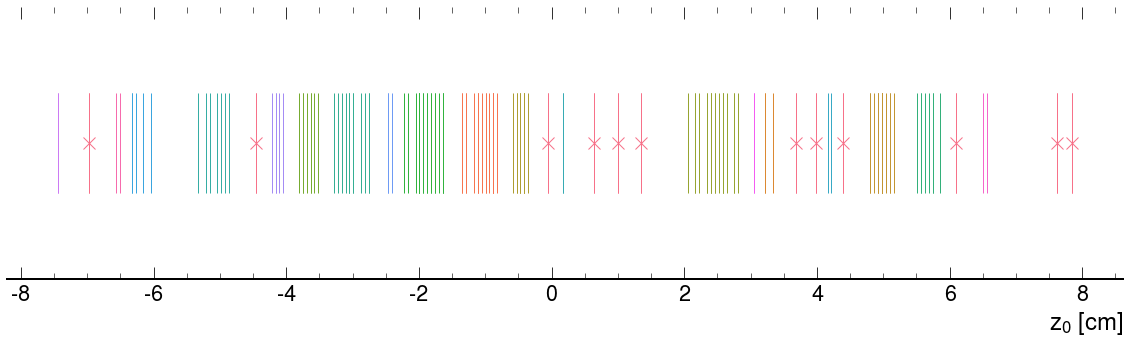

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
for i, color in enumerate(colors):
    if labels[i] == -1:
        ax.plot(e1.trk_z0.values[i], y[i], '|', markersize=100, lw=4, color= color_map[-1])
        ax.plot(e1.trk_z0.values[i], y[i], 'x', markersize=12, lw=4, color = color_map[-1])
    ax.plot(e1.trk_z0.values[i], y[i], '|', markersize = 100, lw=4, color= color)
ax.set_yticks([])
ax.set_xlabel(r'$z_{0}$ [cm]', fontsize = 24)
# ax.set_title('Track clustering')
# ax.set_xlim(3, 3.5)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('tracks_z0.pdf', dpi=600, bbox_inches='tight')

In [28]:
color_map

{-1: (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 0: (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 1: (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 2: (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 3: (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 4: (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 5: (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 6: (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 7: (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 8: (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 9: (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 10: (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 11: (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 12: (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 13: (0.433280341176423, 0.6065273407962815, 0.9585467098271

In [29]:
import copy

In [30]:
# color_map2 = copy.copy(color_map)
color_map[-1] = (1, 1, 1)

In [31]:
e1['labels'] =labels

/tmp/ipykernel_80361/382520071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e1['labels'] =labels


In [32]:
e1['colors']=colors

/tmp/ipykernel_80361/3150835520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e1['colors']=colors


In [33]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(
    e1,
    x="trk_phi",
    y="trk_eta",
    z="trk_z0",
    color=colors,
    color_discrete_map=color_map
)
fig.update_layout(showlegend=False)



In [36]:
e1.groupby('is_pv')['trk_z0'].median()

is_pv
0   -1.113281
1    4.980469
Name: trk_z0, dtype: float32

In [34]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(
    e1.loc[e1.labels==-1],
    x="trk_phi",
    y="trk_eta",
    z="trk_z0",
    color=e1.loc[e1.labels==-1, "colors"],
    color_discrete_map=color_map
)
fig.update_layout(showlegend=False)


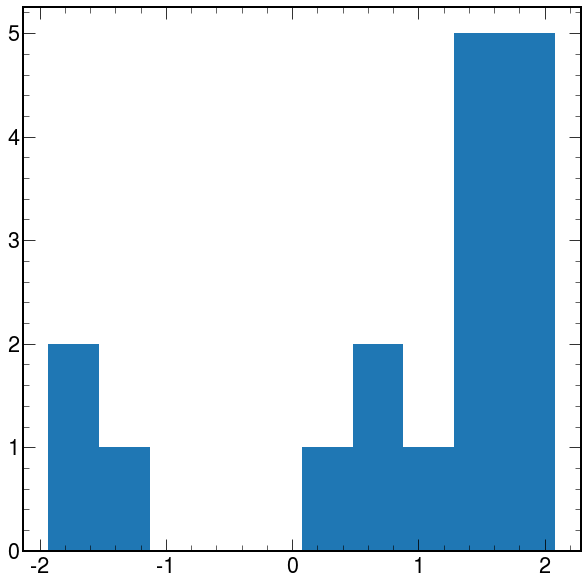

In [56]:
_ = plt.hist(e1.loc[e1.labels==0, 'trk_eta'])

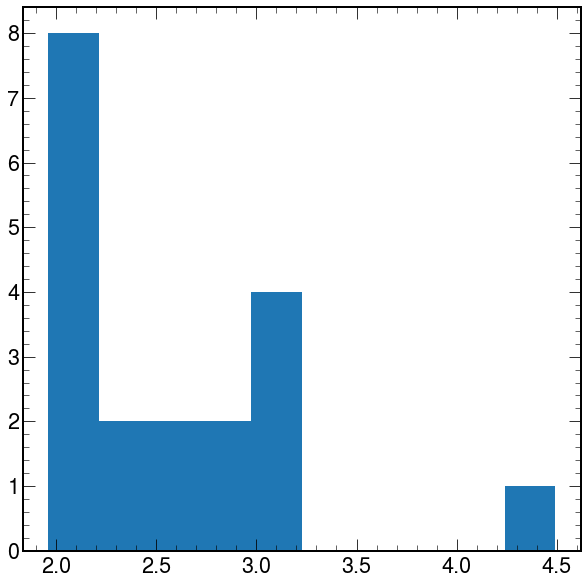

In [79]:
_ = plt.hist(e1.loc[e1.labels==6, 'trk_pt'])

In [81]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18])

In [86]:
cluster_size = []
for i in np.unique(labels):
    if i == -1:
        continue
    tracks_z0 = e1.loc[e1.labels==i, 'trk_z0']
    max_cs = np.max(tracks_z0)
    min_cs = np.min(tracks_z0)
    diff = max_cs - min_cs
    cluster_size.append(diff)
    print(i, diff)

0 0.52734375
1 0.1171875
2 0.3515625
3 0.234375
4 0.76171875
5 0.29296875
6 0.5859375
7 0.3515625
8 0.52734375
9 0.46875
10 0.0
11 0.05859375
12 0.29296875
13 0.05859375
14 0.17578125
15 0.0
16 0.0
17 0.05859375
18 0.05859375


(array([7., 1., 1., 3., 2., 0., 3., 1., 0., 1.]),
 array([0.        , 0.07617188, 0.15234375, 0.22851562, 0.3046875 ,
        0.38085938, 0.45703125, 0.5332031 , 0.609375  , 0.6855469 ,
        0.76171875], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7fae994d4a00>])

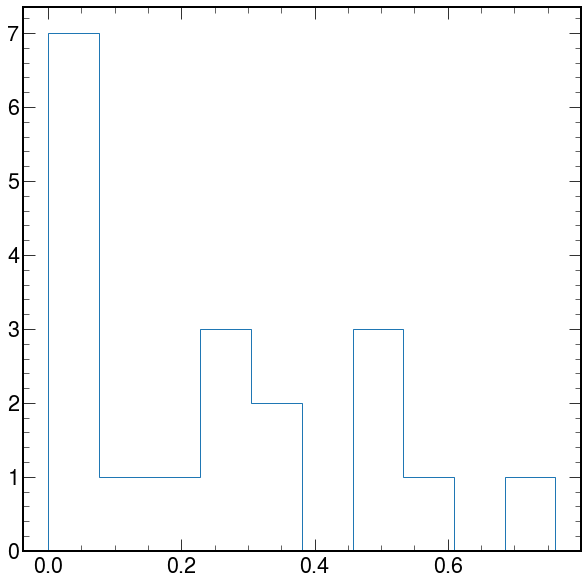

In [94]:
plt.hist(cluster_size, bins =10, histtype='step')

In [91]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(
    e1.loc[e1.labels==10],
    x="trk_phi",
    y="trk_eta",
    z="trk_z0",
    color=e1.loc[e1.labels==10, "trk_fake"],
    color_discrete_map=color_map,
    hover_data=['trk_fake','trk_pt'], labels ={'trk_fake':'trk_fake','trk_pt':'pt'}
)
fig.update_layout(showlegend=False)



# Clustering over the full range

In [99]:
def dbscan(
    z0: np.array, pt: pd.Series, eps: float = 0.08, minPts: int = 2
) -> pd.Series:

    _df = pd.DataFrame({})
    _df["z0"] = z0
    _df["pt"] = pt

    db_clustering = DBSCAN(eps=eps, min_samples=minPts).fit(
        _df["z0"].values.reshape(-1, 1)
    )

    _df["db_label"] = db_clustering.labels_

    # Negative labels correspond to noise points, so floor pt 0 so they don't become the PV
    _df.loc[_df["db_label"] < 0, "pt"] = 0

    # Determine which DBSCAN label corresponds to the primary vertex.
    pv_label = (
        _df.groupby(["db_label"])["pt"].sum().sort_values(ascending=False).index[0]
    )

    _df["db_pv_label"] = 0

    _df.loc[_df["db_label"] == pv_label, "db_pv_label"] = 1

    z0_reco = np.median(_df.loc[_df["db_pv_label"] == 1, "z0"])
    _df["z0_reco_db"] = z0_reco

    return _df[["db_pv_label", "z0_reco_db", "db_label"]]

In [100]:
    def run_dbscan(df, eps: float = 0.08, minPts: int = 2):

        pv_dbscan = df.groupby(level=0).progress_apply(
            lambda x: dbscan(x["trk_z0"], x["trk_pt"], eps, minPts)
        )

        df["db_pv_label"] = pv_dbscan["db_pv_label"]
        df["db_label"] = pv_dbscan["db_label"]
#         z0_reco_db = self.trk.groupby(level=0)["z0_reco_db"].first().values


        print(f"Ran DBSCAN with eps: {eps}, minPts: {minPts}")

In [101]:
run_dbscan(trk)

100%|█████████████████████████████████████████████████████████████████████████████████| 25000/25000 [01:43<00:00, 240.58it/s]


Ran DBSCAN with eps: 0.08, minPts: 2


In [ ]:
cluster_size = []
for i in np.unique(labels):
    if i == -1:
        continue
    tracks_z0 = e1.loc[e1.labels==i, 'trk_z0']
    max_cs = np.max(tracks_z0)
    min_cs = np.min(tracks_z0)
    diff = max_cs - min_cs
    cluster_size.append(diff)
    print(i, diff)

In [121]:
from tqdm.notebook import trange, tqdm

In [122]:
non_pv_size = [] 
pv_size = []
for i in trange(25000):
    _e = trk.query(f"entry=={i}")
    labels = _e.db_label.unique()
    pv_label = _e.loc[_e.db_pv_label==1,'db_label'].iloc[0]
    
    for j in labels:
        
        if j == -1:
            continue
            
        tracks_z0 = _e.loc[_e.db_label==j, 'trk_z0']
        max_cs = np.max(tracks_z0)
        min_cs = np.min(tracks_z0)
        diff = max_cs - min_cs
        
        if j == pv_label:
            pv_size.append(diff)
        else:
            non_pv_size.append(diff)
    
    



  0%|          | 0/25000 [00:00<?, ?it/s]

In [136]:
non_pv_len = [] 
pv_len = []
for i in trange(25000):
    _e = trk.query(f"entry=={i}")
    labels = _e.db_label.unique()
    pv_label = _e.loc[_e.db_pv_label==1,'db_label'].iloc[0]
    
    for j in labels:
        
        if j == -1:
            continue
            
        tracks_z0 = _e.loc[_e.db_label==j, 'trk_z0']

        
        if j == pv_label:
            pv_len.append(len(tracks_z0))
        else:
            non_pv_len.append(len(tracks_z0))
    
    

  0%|          | 0/25000 [00:00<?, ?it/s]

0.05859375
0.52734375


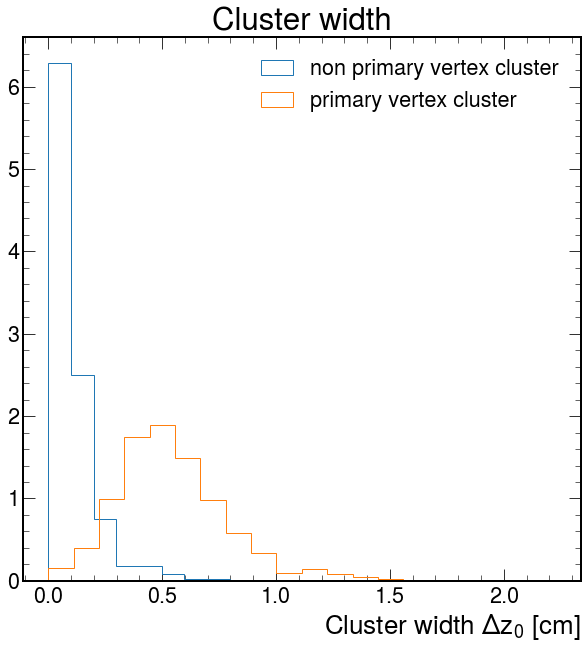

In [150]:
_ = plt.hist(non_pv_size, bins = 20, histtype='step', density=True, label = 'non primary vertex cluster')
_ = plt.hist(pv_size, bins = 20, histtype='step', density=True, label = 'primary vertex cluster')
print(np.median(non_pv_size))
print(np.median(pv_size))
plt.title('Cluster width')
plt.xlabel('Cluster width $\Delta z_0$ [cm]')
plt.legend()
# plt.yscale()

3.0
29.0


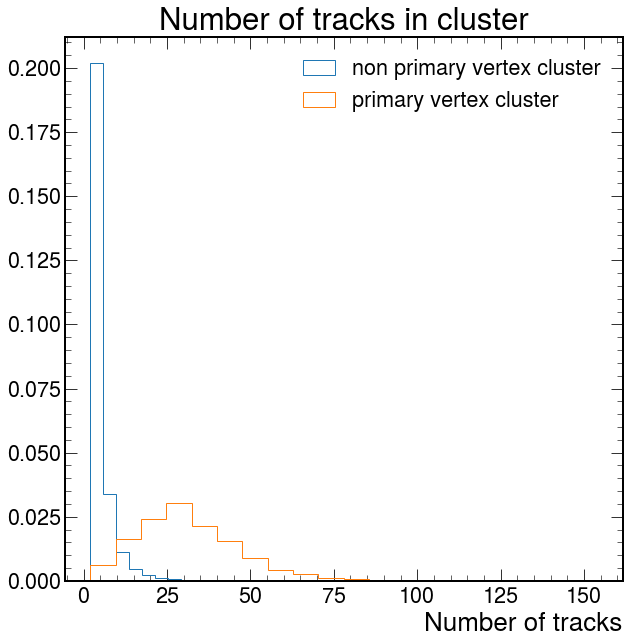

In [151]:
_ = plt.hist(non_pv_len, bins = 20, histtype='step', density=True, label = 'non primary vertex cluster')
_ = plt.hist(pv_len, bins = 20, histtype='step', density=True, label = 'primary vertex cluster')
print(np.median(non_pv_len))
print(np.median(pv_len))
plt.title('Number of tracks in cluster')
plt.xlabel('Number of tracks')
plt.legend()
# plt.yscale()

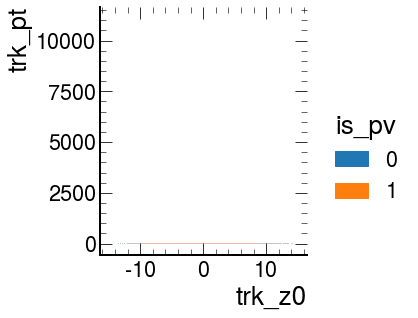

In [152]:
sns.displot(trk, x= "trk_z0", y="trk_pt", hue='is_pv')

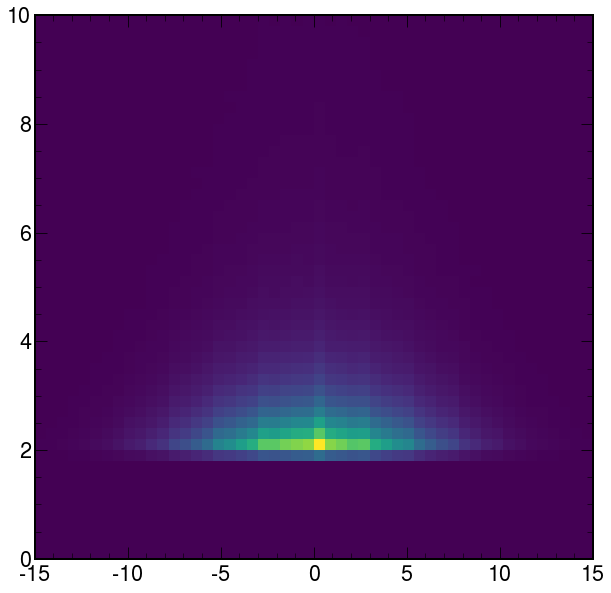

In [156]:
_=plt.hist2d(trk.trk_z0.values, trk.trk_pt.values, bins=(50,50), range=((-15, 15), (0, 10)))

In [157]:
trk.trk_pt.describe()

count    4.562536e+06
mean     3.705188e+00
std      1.999982e+01
min      1.950115e+00
25%      2.181140e+00
50%      2.552772e+00
75%      3.344985e+00
max      1.110201e+04
Name: trk_pt, dtype: float64

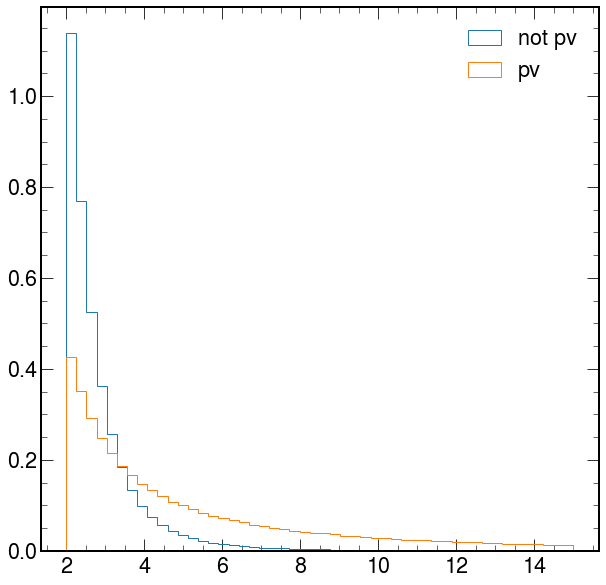

In [163]:
_ = plt.hist(
    trk.loc[trk.is_pv == 0, "trk_pt"],
    bins=50,
    range=(2, 15),
    histtype="step",
    density=True,
    label="not pv",
)
_ = plt.hist(
    trk.loc[trk.is_pv == 1, "trk_pt"],
    bins=50,
    range=(2, 15),
    histtype="step",
    density=True,
    label="pv",
)
plt.legend()

In [167]:
is_pv_e1 = trk.query('entry==0').is_pv.values
e1['is_pv'] = is_pv_e1

/tmp/ipykernel_967558/2830005594.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



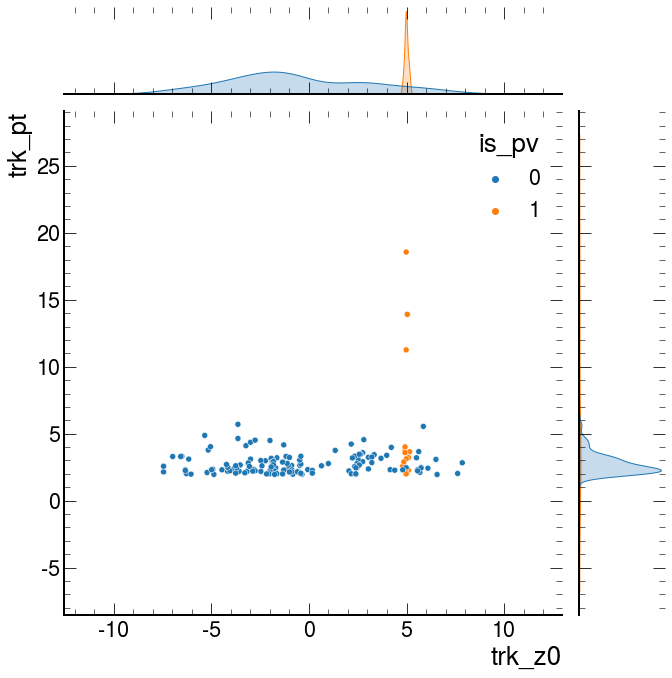

In [172]:
sns.jointplot(data=e1, x='trk_z0',y='trk_pt', hue='is_pv', height=10)

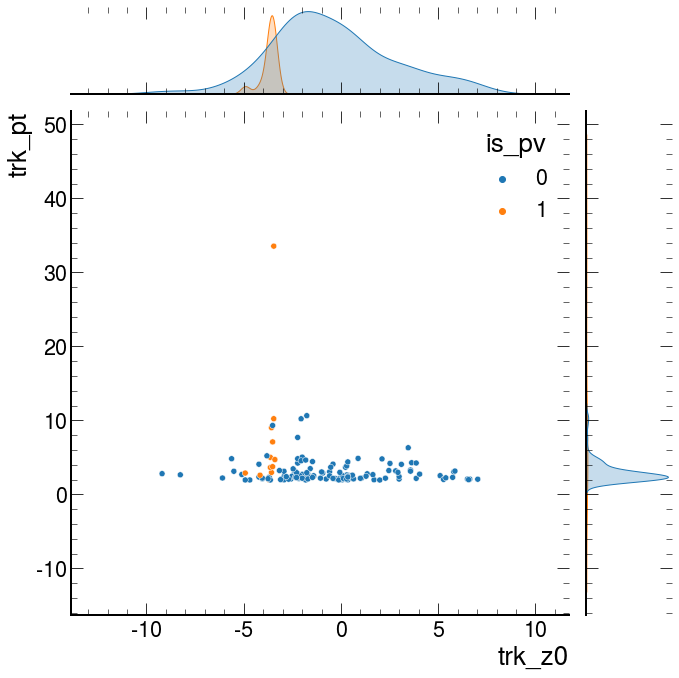

In [173]:
sns.jointplot(data=trk.query('entry==1'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)

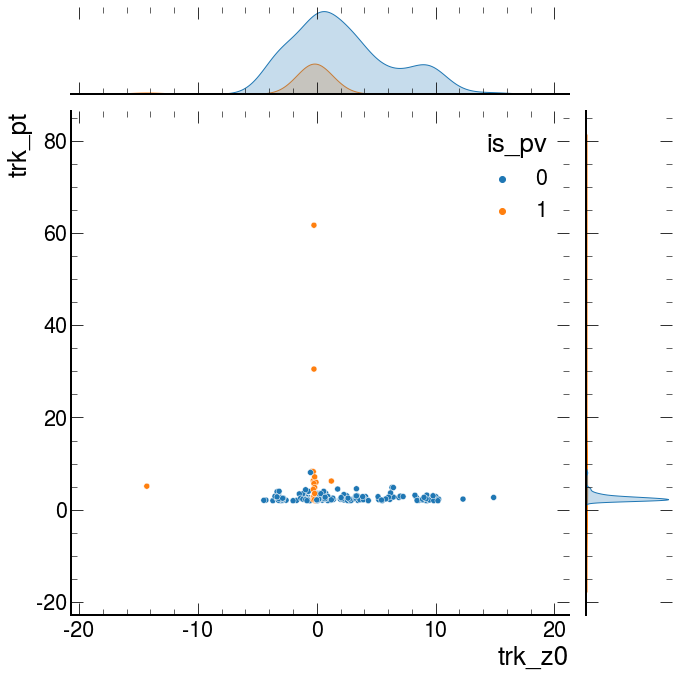

In [174]:
sns.jointplot(data=trk.query('entry==2'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)

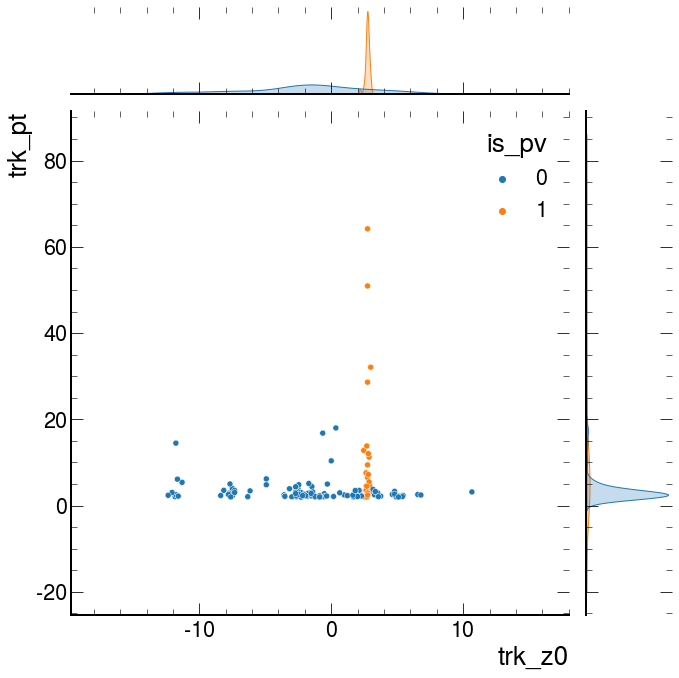

In [175]:
sns.jointplot(data=trk.query('entry==3'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)

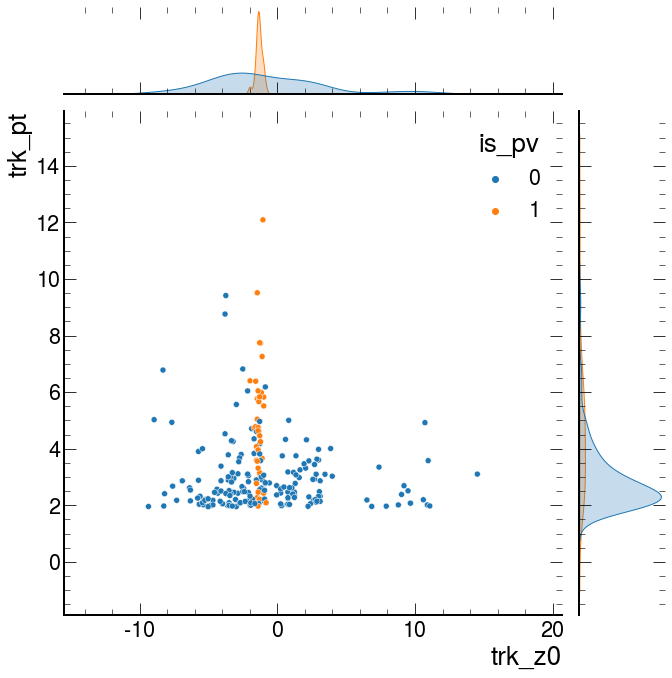

In [176]:
sns.jointplot(data=trk.query('entry==4'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)

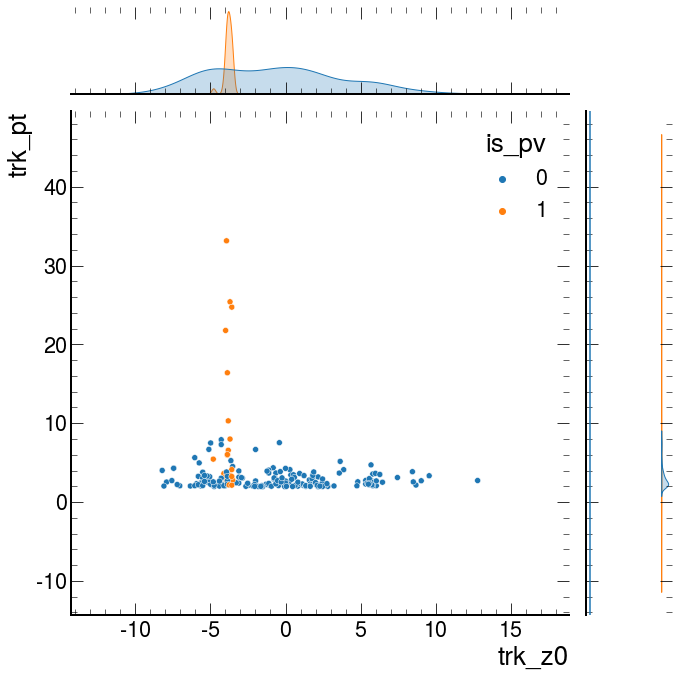

In [225]:
sns.jointplot(data=trk.query('entry==5'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)
plt.axvline(-5)

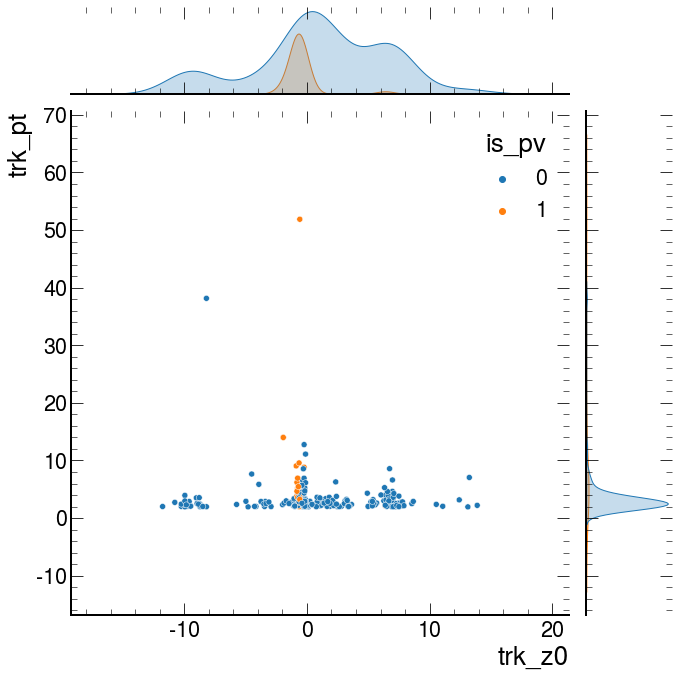

In [178]:
sns.jointplot(data=trk.query('entry==6'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)

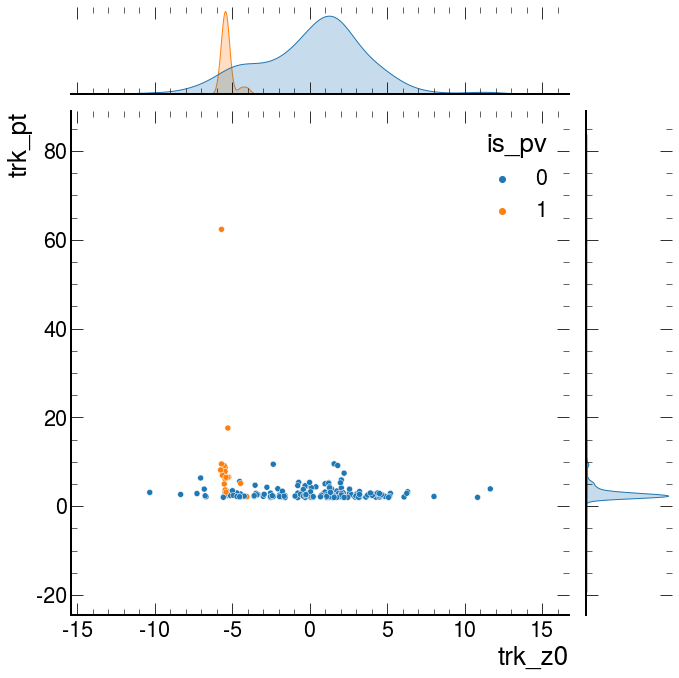

In [179]:
sns.jointplot(data=trk.query('entry==7'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)

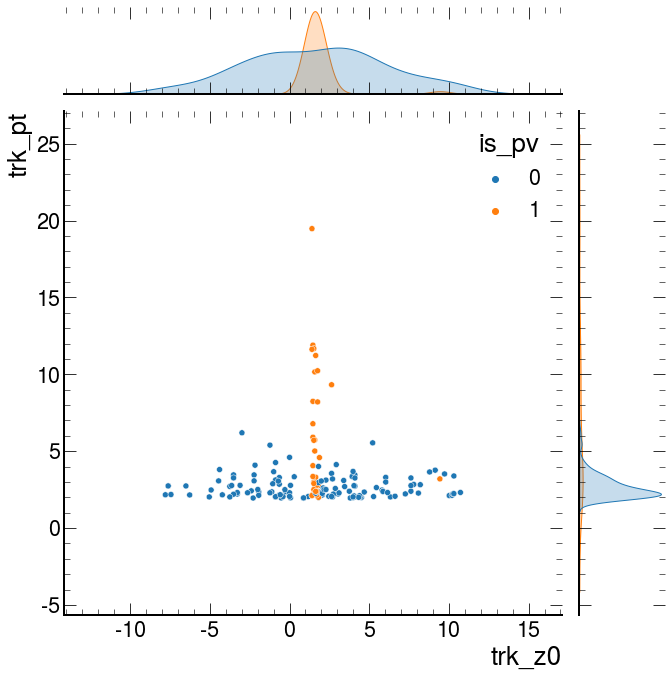

In [180]:
sns.jointplot(data=trk.query('entry==8'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)

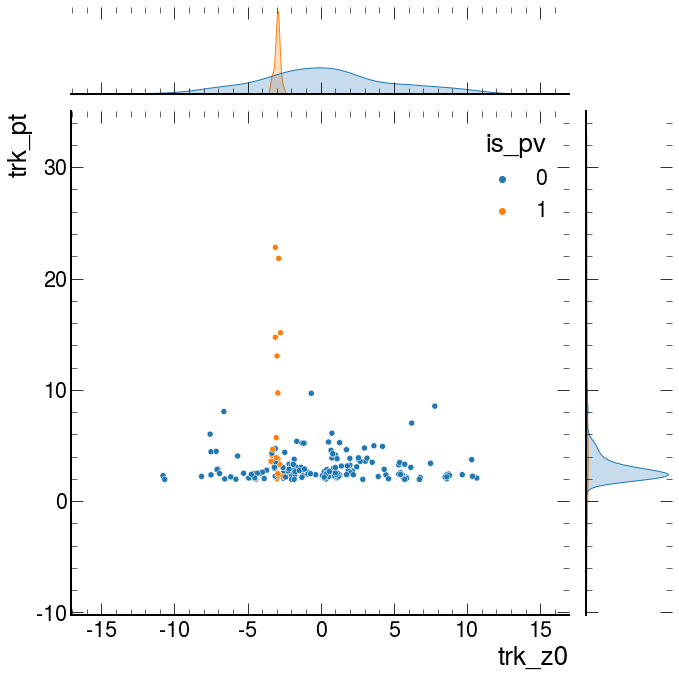

In [181]:
sns.jointplot(data=trk.query('entry==9'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)

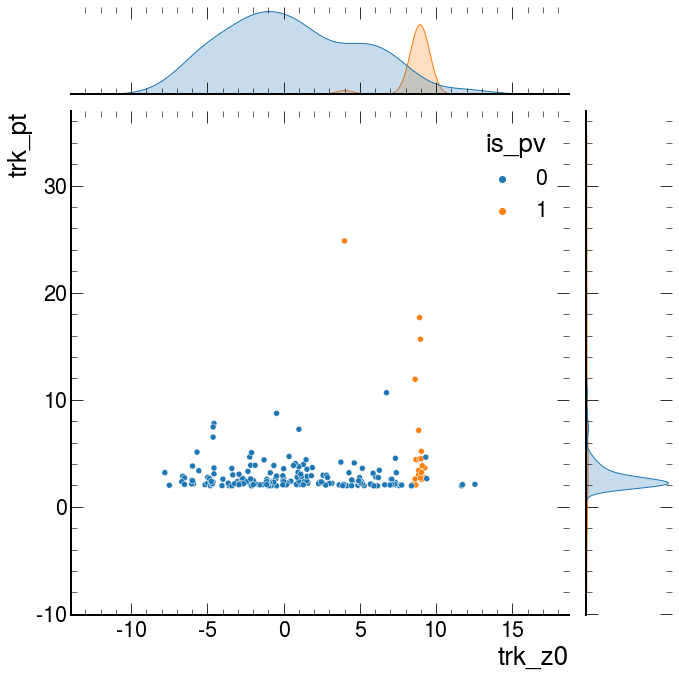

In [182]:
sns.jointplot(data=trk.query('entry==10'), x='trk_z0',y='trk_pt', hue='is_pv', height=10)

In [273]:
trk.query('entry==10').sort_values(by='trk_pt', ascending = False).iloc[0:5]

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0  trk_fake  \
entry subentry                                                              
10    149       24.836700  0.031245 -1.945564   999.0  3.984375         1   
      150       17.678352 -0.144033 -1.927749   999.0  8.906250         1   
      54        15.658681  1.103680  1.727549   999.0  8.964844         1   
      6         11.912022 -1.807270  0.096947   999.0  8.613281         1   
      182       10.654515 -0.390398 -0.592232   999.0  6.738281         2   

                is_pv  db_pv_label  db_label  primary vertex  
entry subentry                                                
10    149           1            0        35            True  
      150           1            1         7            True  
      54            1            1         7            True  
      6             1            0         6            True  
      182           0            0        -1           False

In [274]:
z0_5 = trk.query('entry==10').sort_values(by='trk_pt', ascending = False).iloc[0:5].trk_z0

In [275]:
np.mean(z0_5)

7.4414062

In [284]:
np.median(z0_5)

8.613281

In [292]:
import statistics

In [293]:
statistics.mode(z0_5)

3.984375

In [289]:
mc.iloc[10]

pv_L1reco_z0      8.856916
pv_L1reco_sum    74.818878
pv_MC             8.991512
Name: (10, 0), dtype: float32

In [276]:
e10 = trk.query('entry==10')

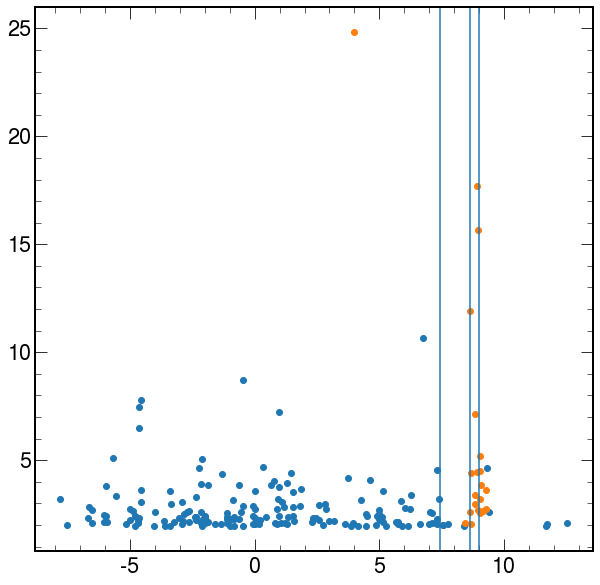

In [290]:
_= plt.scatter(e10.loc[~e10['primary vertex'], 'trk_z0'], e10.loc[~e10['primary vertex'], 'trk_pt'])


_= plt.scatter(e10.loc[e10['primary vertex'], 'trk_z0'], e10.loc[e10['primary vertex'], 'trk_pt'])

plt.axvline(7.4414)
plt.axvline(8.613)
plt.axvline(8.991512)

In [265]:
trk['primary vertex'] = trk['is_pv']

In [267]:
trk['primary vertex'] = trk['primary vertex'].astype(bool)

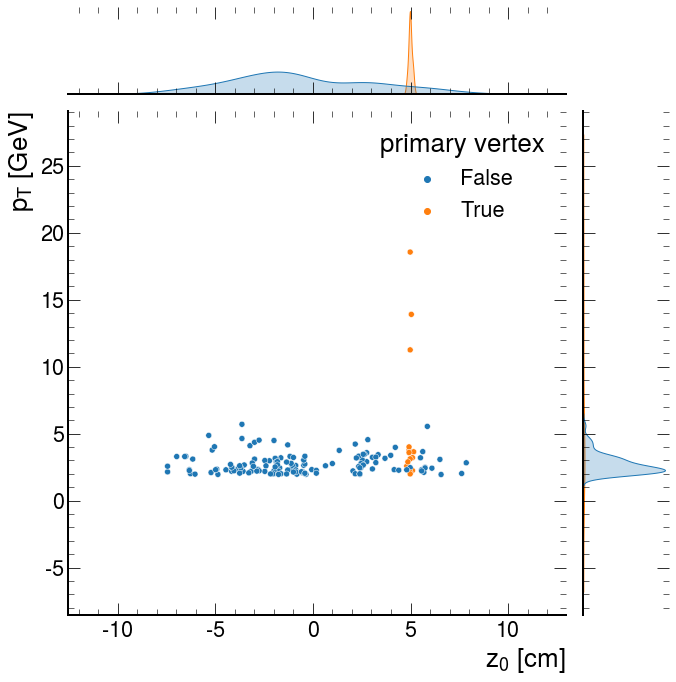

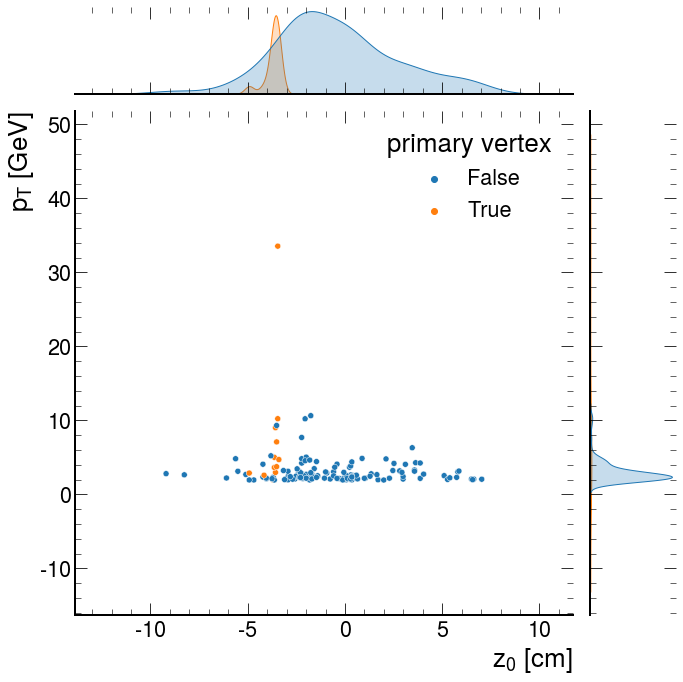

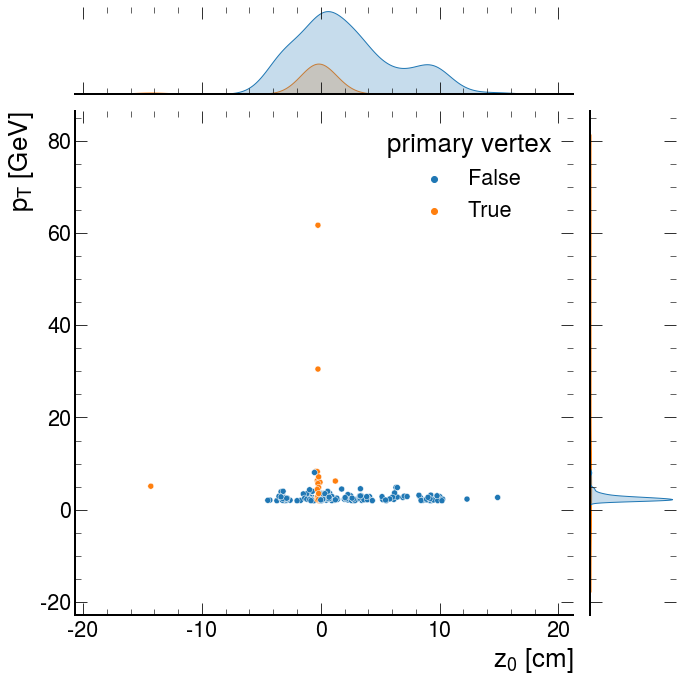

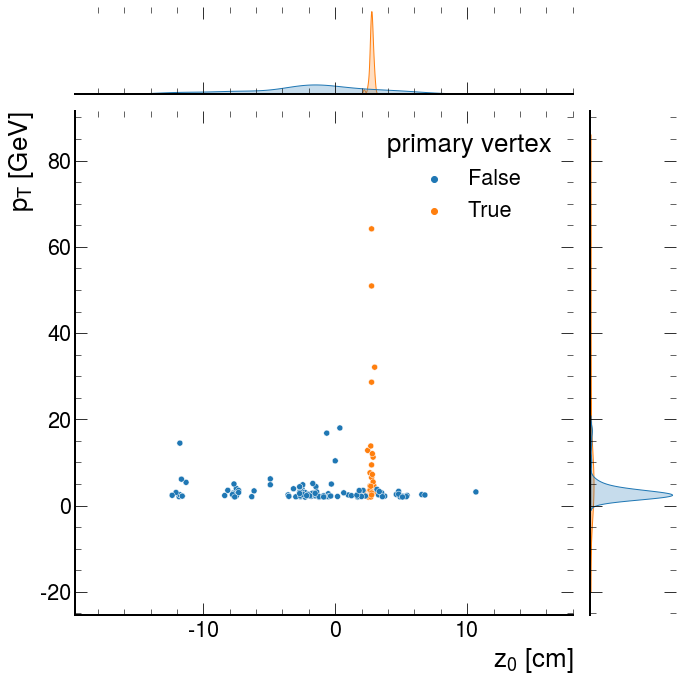

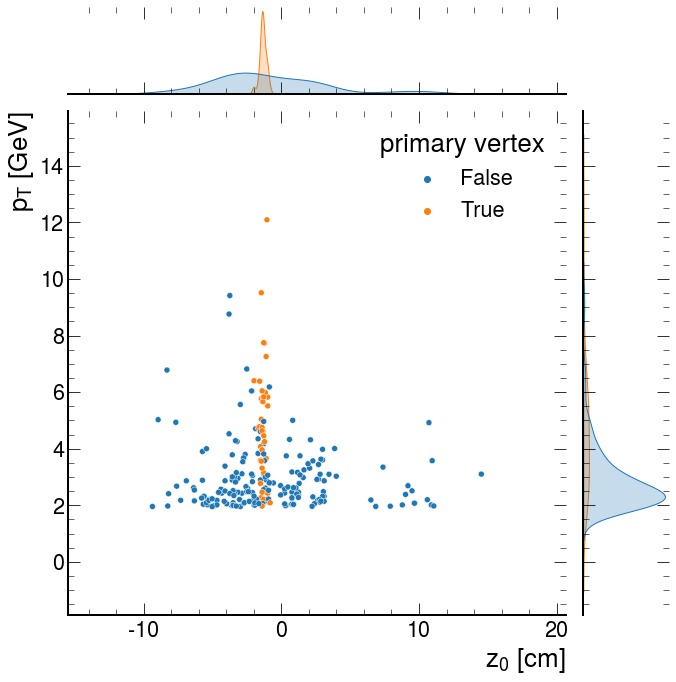

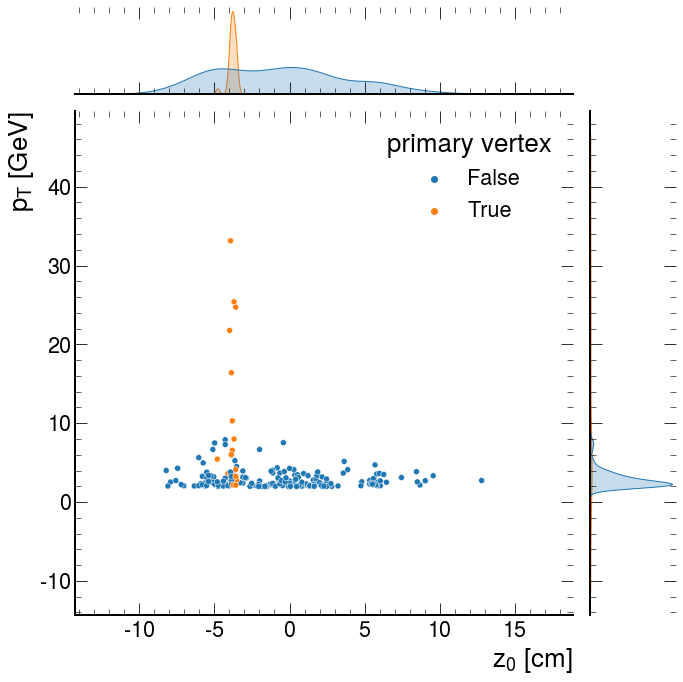

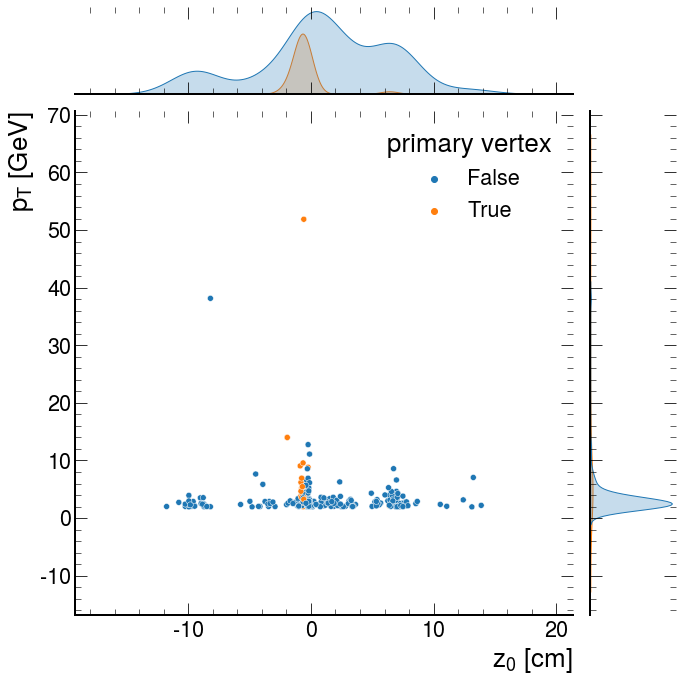

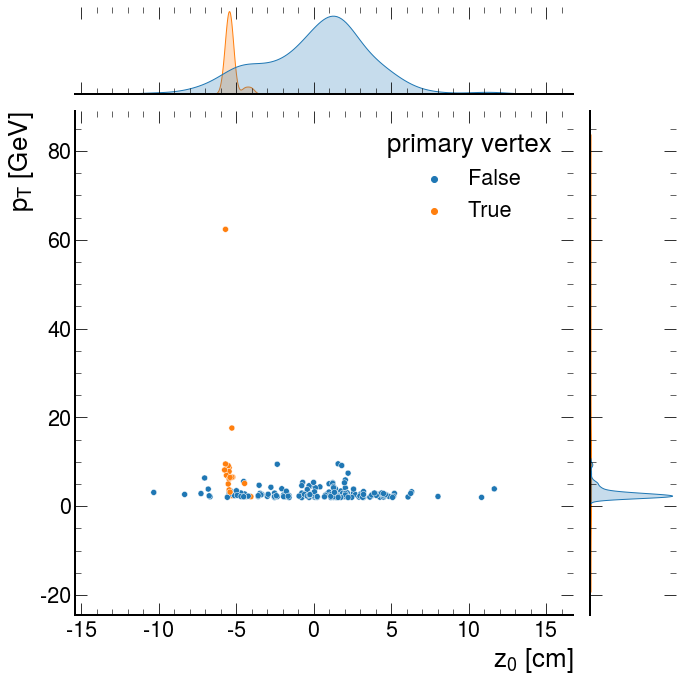

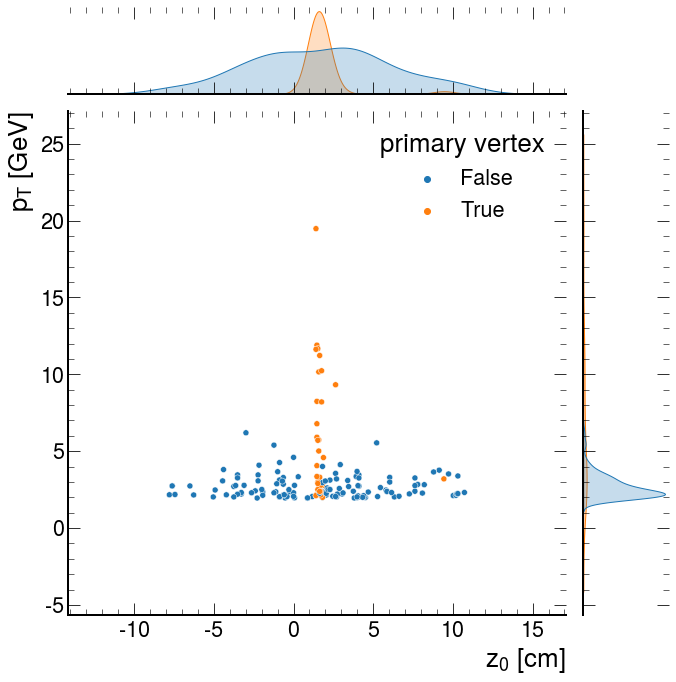

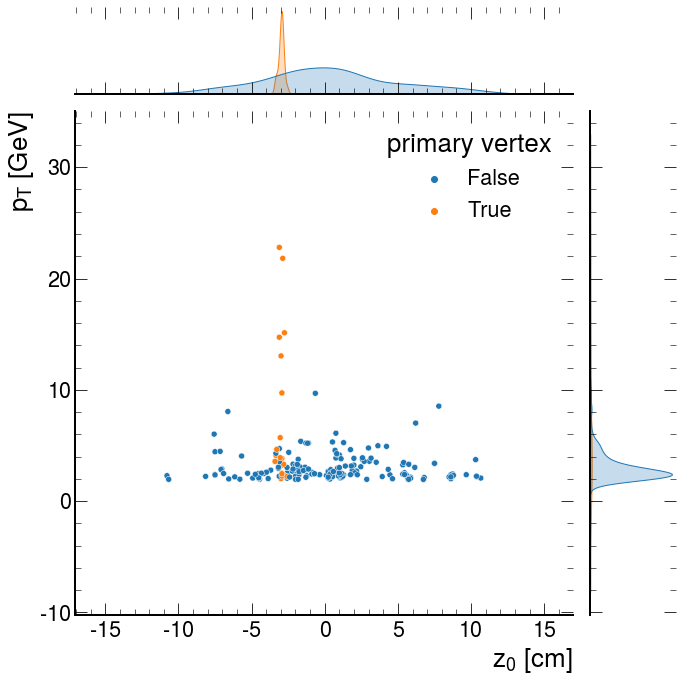

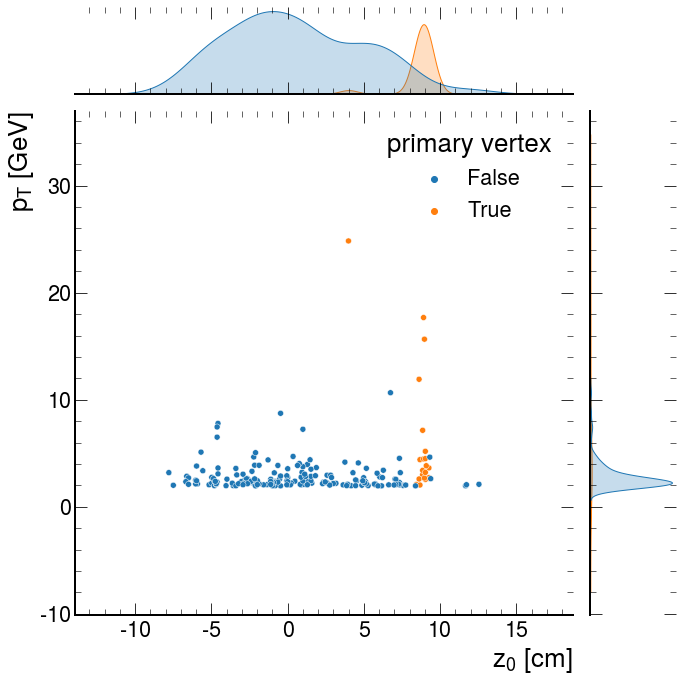

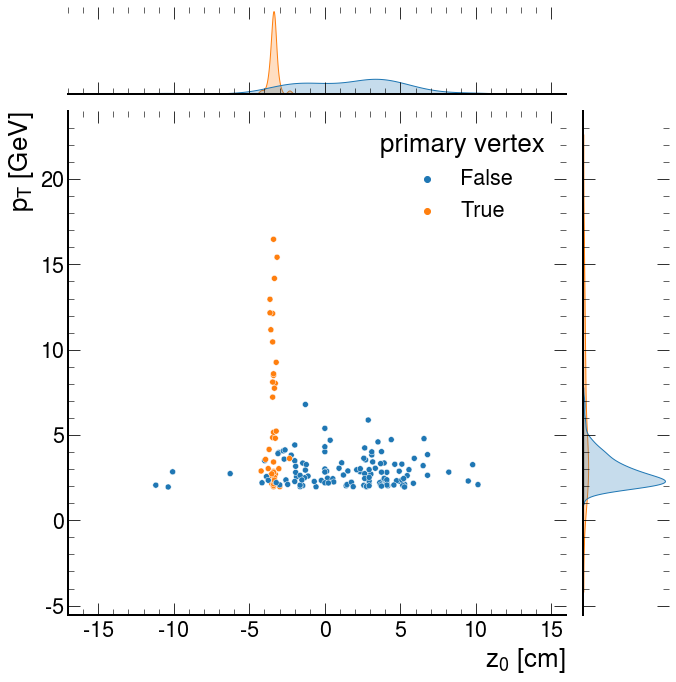

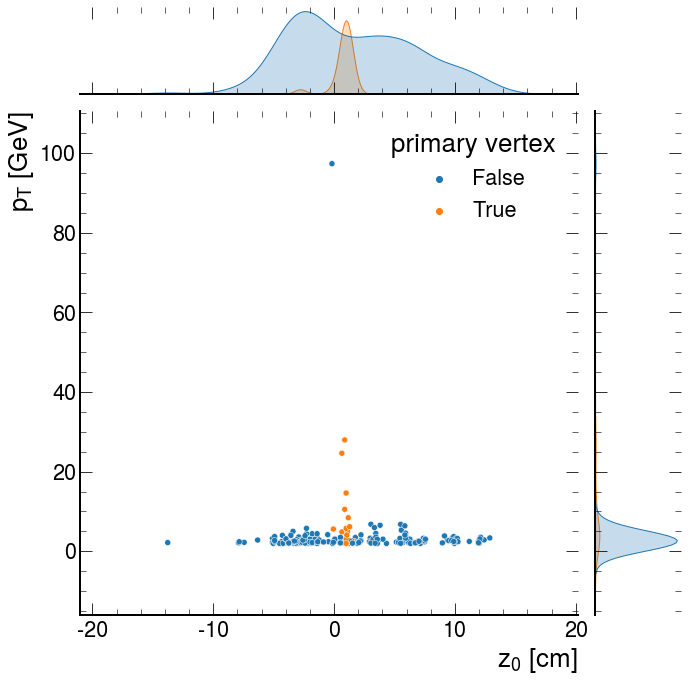

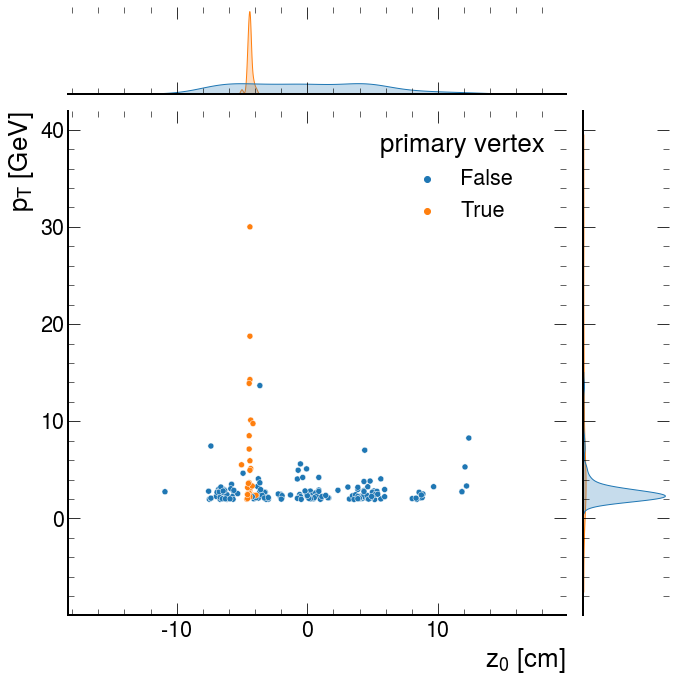

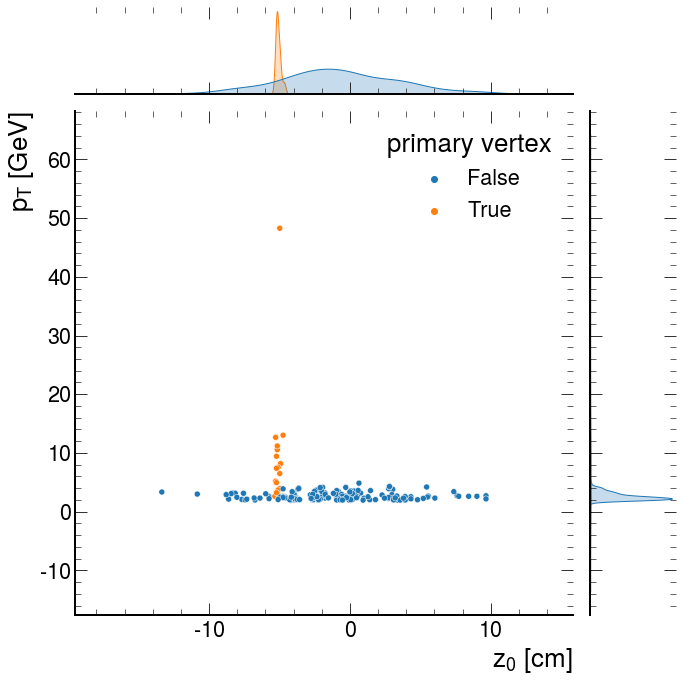

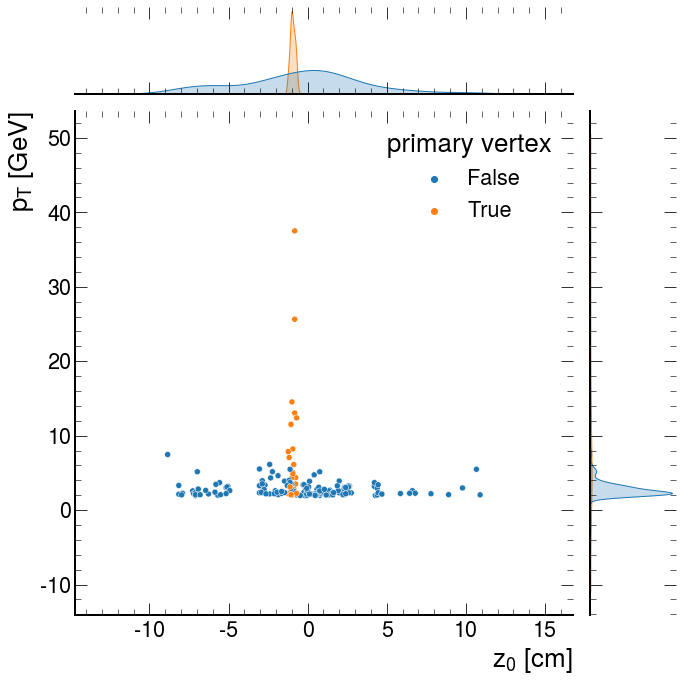

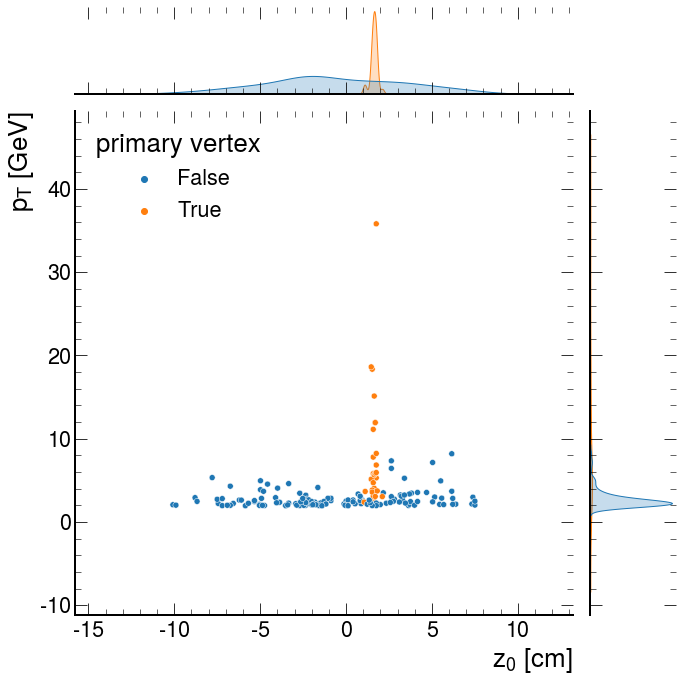

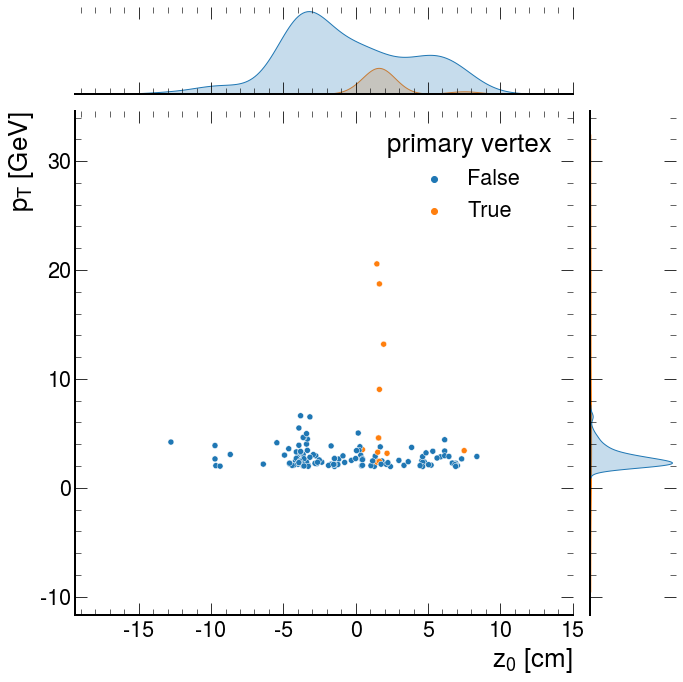

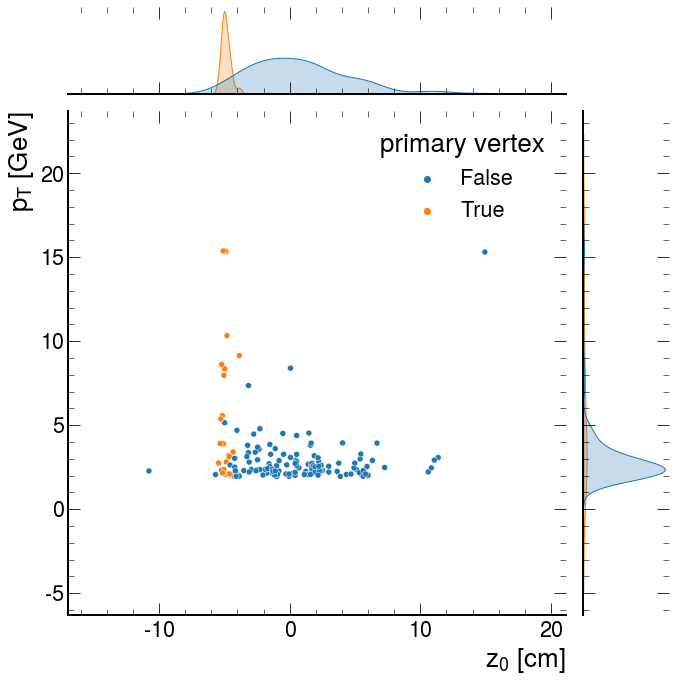

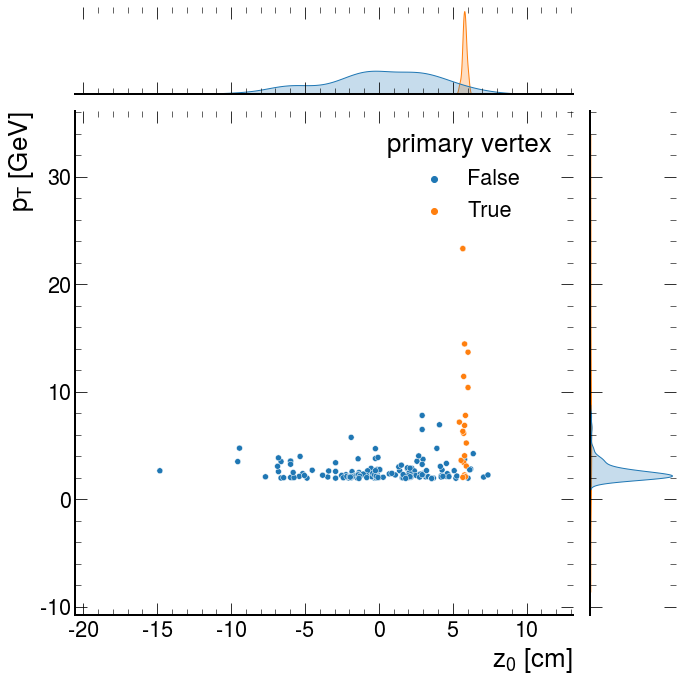

In [269]:
for i in range(20):
    h=sns.jointplot(data=trk.query(f'entry=={i}'), x='trk_z0',y='trk_pt', hue='primary vertex', height=10)
    h.set_axis_labels(r'$z_0$ [cm]', r'$p_T$ [GeV]')
    plt.savefig(f'plots2d/event_{i}.png',dpi=400, bbox_inches='tight')

### How often is the max pT belong to the pv? 

In [188]:
e1.sort_values(by="trk_pt", ascending=False).iloc[0]['is_pv']

1

Lets see, how many times do we get a primary vertex by simply getting the maximum $p_T$. 
Then we can also see what the max pT of a primary vertex is and the max pT when it is not a primary vertex


In [294]:
max_is_pv = 0
max_is_not_pv = 0
max_is_pv_pt = []
max_is_not_pv_pt = []
z0_max_pv = []
z0_max_not_pv = []
diff_z0_pv = []
diff_z0_not_pv = []
max_2nd_pv = 0
max_2nd_not_pv = 0
max_3rd_pv = 0
max_3rd_not_pv = 0
diff3 = []
diff5= []


for i in trange(25000):
    
    _e = trk.query(f"entry=={i}")
    
    _e_s = _e.sort_values(by="trk_pt",ascending=False)
    
    med_3 = np.median(_e_s.iloc[0:3]['trk_z0'])
    med_5 = np.median(_e_s.iloc[0:5]['trk_z0'])
    
    _is_pv = _e_s.iloc[0]['is_pv']
    _is_pv2 = _e_s.iloc[1]['is_pv']
    _is_pv3 = _e_s.iloc[2]['is_pv']
    _pt = _e_s.iloc[0]["trk_pt"]
    _z0 = _e_s.iloc[0]["trk_z0"]
    _z0_t = mc.iloc[i]["pv_MC"]
    _diff = _z0_t - _z0
    _diff3 = med_3 - _z0
    _diff5 = med_5 - _z0
    diff3.append(_diff3)
    diff5.append(_diff5)
    
    if _is_pv:
        max_is_pv += 1
#         print(i, "is")
        max_is_pv_pt.append(_pt)
        z0_max_pv.append(_z0)
        diff_z0_pv.append(_diff)
    else:
        max_is_not_pv += 1
#         print(i, "not")
        max_is_not_pv_pt.append(_pt)
        z0_max_not_pv.append(_z0)
        diff_z0_not_pv.append(_diff)
        
    if _is_pv2:
        max_2nd_pv+=1
    else:
        max_2nd_not_pv+=1
    if _is_pv3:
        max_3rd_pv+=1
    else:
        max_3rd_not_pv+=1
            
    
    

  0%|          | 0/25000 [00:00<?, ?it/s]

In [227]:
100 * max_is_pv/25000

86.548

In [257]:
100*max_2nd_pv/25000

86.232

In [258]:
100*max_3rd_pv/25000

82.944

 roughly 87 % of the time simply by selecting the maximum pt track do we get a track that belongs to the primary vertex. 

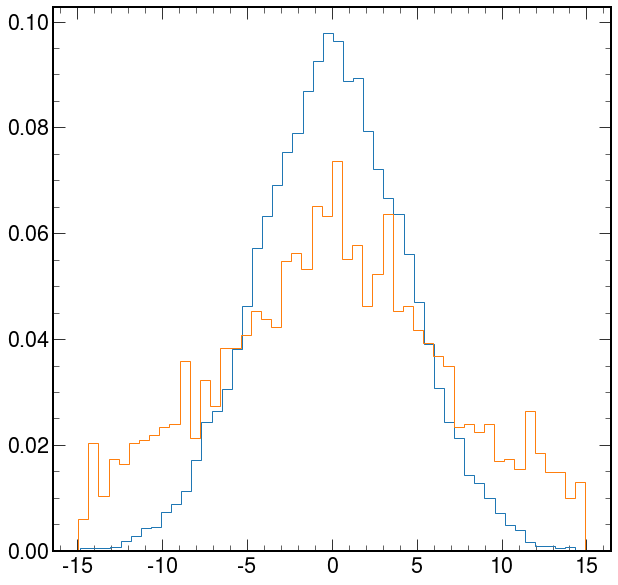

In [235]:
_=plt.hist(z0_max_pv, bins = 50, histtype='step', density=True)
_=plt.hist(z0_max_not_pv, bins = 50, histtype='step',density=True)

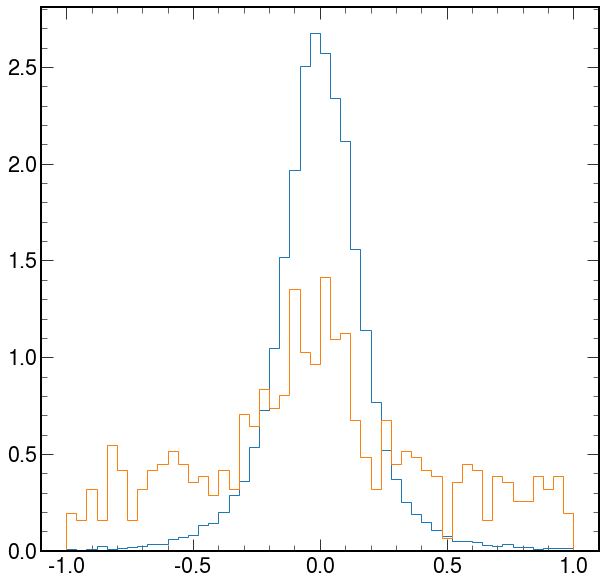

In [240]:
h, be, _  = plt.hist(diff_z0_pv, bins = 50, range=(-1, 1), histtype='step',density=True)
_ = plt.hist(diff_z0_not_pv, bins =be, histtype='step', density=True)


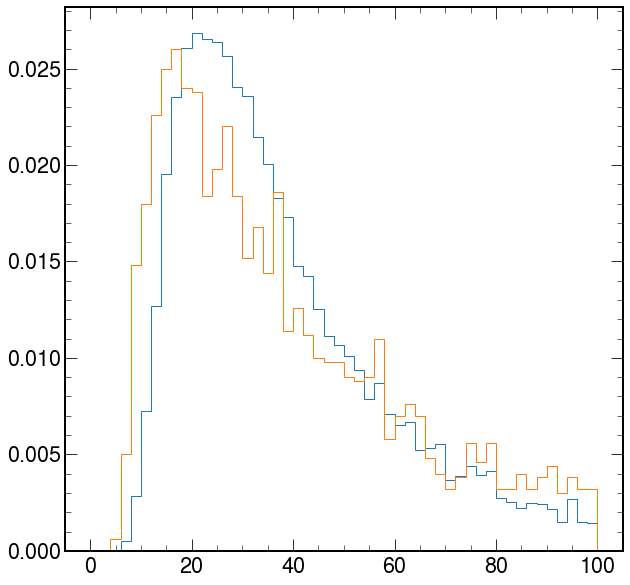

In [250]:
_= plt.hist(max_is_pv_pt, bins = 50, range=(0, 100), histtype='step', density=True)
_= plt.hist(max_is_not_pv_pt, bins = 50, range=(0,100), histtype='step', density=True)

In [296]:
diff5

[0.0,
 0.0,
 -0.05859375,
 0.0,
 -0.41015625,
 0.05859375,
 -1.3476562,
 0.41015625,
 0.05859375,
 0.1171875,
 4.6289062,
 0.0,
 1.0546875,
 0.0,
 -0.17578125,
 0.0,
 -0.1171875,
 0.17578125,
 0.05859375,
 0.05859375,
 13.183594,
 0.0,
 -2.4023438,
 0.05859375,
 -0.05859375,
 -0.46875,
 -0.17578125,
 0.0,
 0.05859375,
 0.0,
 0.1171875,
 0.52734375,
 0.1171875,
 0.0,
 -0.1171875,
 -0.05859375,
 -0.05859375,
 -0.17578125,
 -0.9375,
 0.0,
 -0.05859375,
 0.0,
 0.0,
 0.0,
 0.1171875,
 -0.29296875,
 0.0,
 0.17578125,
 0.234375,
 0.0,
 0.0,
 -0.1171875,
 0.0,
 -0.29296875,
 0.0,
 0.0,
 0.17578125,
 -0.05859375,
 -0.3515625,
 0.0,
 -0.1171875,
 0.0,
 -0.1171875,
 -3.6328125,
 -6.2109375,
 -0.17578125,
 0.0,
 0.0,
 2.9296875,
 -1.40625,
 0.17578125,
 -0.3515625,
 0.0,
 -10.488281,
 0.0,
 -1.1132812,
 -3.6328125,
 0.0,
 -3.984375,
 -0.05859375,
 0.3515625,
 9.199219,
 -3.2226562,
 -0.17578125,
 -0.1171875,
 0.0,
 -0.1171875,
 0.0,
 0.0,
 0.0,
 -0.17578125,
 0.76171875,
 0.05859375,
 -0.17578125,

(-1.0, 1.0)

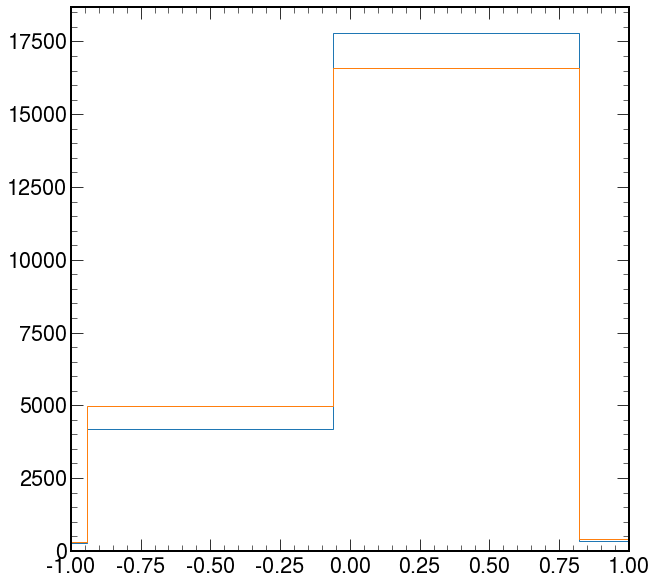

In [303]:
_, be, _ = plt.hist(diff3, bins = 50, histtype='step',label ='median of top 3')
_ = plt.hist(diff5, bins=be, histtype='step', label = 'median of top 5')
plt.xlim(-1, 1)

In [350]:
# max_is_pv = 0
# max_is_not_pv = 0
# max_is_pv_pt = []
# max_is_not_pv_pt = []
# z0_max_pv = []
# z0_max_not_pv = []
# diff_z0_pv = []
# diff_z0_not_pv = []
# max_2nd_pv = 0
# max_2nd_not_pv = 0
# max_3rd_pv = 0
# max_3rd_not_pv = 0
# diff3 = []
# diff5= []

all_pv_pt = []
all_not_pv_pt = []


for i in trange(5000):
    
    _e = trk.query(f"entry=={i}")
    
#     _e_s = _e.sort_values(by="trk_pt",ascending=False)
    is_pv = _e.is_pv == 1
    pt_pv = _e.loc[is_pv, 'trk_pt'].values
    pt_not_pv = _e.loc[~is_pv, 'trk_pt'].values
    
    all_pv_pt.append(pt_pv)
    all_not_pv_pt.append(pt_not_pv)
    
    
#     med_3 = np.median(_e_s.iloc[0:3]['trk_z0'])
#     med_5 = np.median(_e_s.iloc[0:5]['trk_z0'])
    
#     _is_pv = _e_s.iloc[0]['is_pv']
#     _is_pv2 = _e_s.iloc[1]['is_pv']
#     _is_pv3 = _e_s.iloc[2]['is_pv']
#     _pt = _e_s.iloc[0]["trk_pt"]
#     _z0 = _e_s.iloc[0]["trk_z0"]
#     _z0_t = mc.iloc[i]["pv_MC"]
#     _diff = _z0_t - _z0
#     _diff3 = med_3 - _z0
#     _diff5 = med_5 - _z0
#     diff3.append(_diff3)
#     diff5.append(_diff5)
    
#     if _is_pv:
#         max_is_pv += 1
# #         print(i, "is")
#         max_is_pv_pt.append(_pt)
#         z0_max_pv.append(_z0)
#         diff_z0_pv.append(_diff)
#     else:
#         max_is_not_pv += 1
# #         print(i, "not")
#         max_is_not_pv_pt.append(_pt)
#         z0_max_not_pv.append(_z0)
#         diff_z0_not_pv.append(_diff)
        
#     if _is_pv2:
#         max_2nd_pv+=1
#     else:
#         max_2nd_not_pv+=1
#     if _is_pv3:
#         max_3rd_pv+=1
#     else:
#         max_3rd_not_pv+=1
            
    
    

  0%|          | 0/5000 [00:00<?, ?it/s]

In [357]:
means_pv = [np.mean(x) for x in all_pv_pt]
medians_pv = [np.median(x) for x in all_pv_pt]

In [359]:
means_not_pv = [np.mean(x) for x in all_not_pv_pt]
medians_not_pv = [np.median(x) for x in all_not_pv_pt]

In [358]:
medians_pv

[3.2086718,
 3.7519448,
 4.833263,
 4.482036,
 4.353697,
 3.5330768,
 4.801905,
 6.49053,
 3.7079062,
 3.833565,
 3.6316667,
 4.1533875,
 4.4535303,
 3.3369417,
 5.200002,
 4.908048,
 5.296758,
 4.038844,
 3.8954406,
 6.238517,
 3.231084,
 3.750496,
 3.1996374,
 3.9494858,
 3.192066,
 3.6638114,
 6.395164,
 4.816488,
 4.1627316,
 5.8217125,
 2.6816437,
 4.678951,
 5.511249,
 3.5805087,
 4.678468,
 3.4076135,
 5.1763554,
 6.0967684,
 4.0326934,
 5.5426884,
 4.1348248,
 6.895655,
 3.3058152,
 4.168984,
 5.705618,
 4.803983,
 3.9009197,
 3.4596462,
 4.5063505,
 3.9607582,
 5.5565157,
 6.2370815,
 2.8085008,
 7.1718497,
 5.069408,
 6.4247713,
 6.34763,
 3.7244368,
 3.6247396,
 4.264433,
 5.557231,
 3.2860258,
 5.834446,
 4.658843,
 4.0268426,
 2.7197828,
 3.3703718,
 3.9160511,
 5.0031567,
 4.489233,
 5.373671,
 3.1335042,
 3.7481449,
 4.676505,
 3.880672,
 2.5964258,
 6.106167,
 4.4125614,
 4.421856,
 5.1403008,
 6.024631,
 2.8056622,
 6.325928,
 4.2765813,
 4.2251863,
 3.2021935,
 3.9214

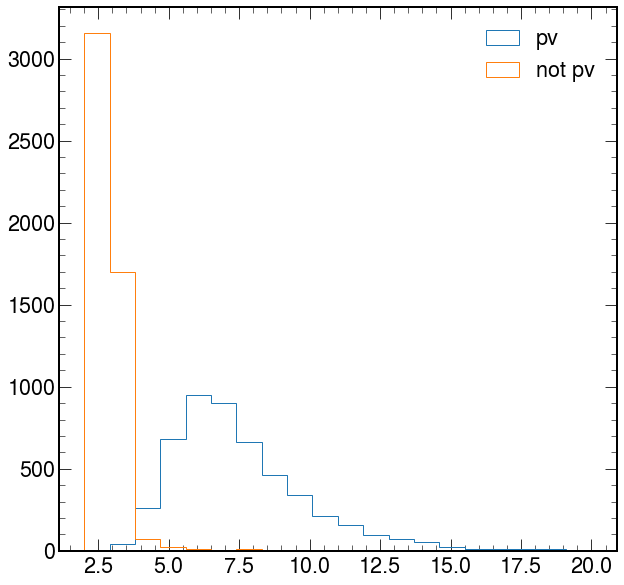

In [364]:
_, be, _ = plt.hist(means_pv, histtype='step', bins =20, label = 'pv', range=(2,20))
_ = plt.hist(means_not_pv, histtype='step', bins=be, label = 'not pv')
plt.legend()

In [367]:
(all_pv_pt[0] > 5).sum()

3

In [368]:
count_above_5 = 0
count_above_4 = 0
for pv_pt in all_pv_pt:
    
    
    count4 = (pv_pt > 4).sum()
    count5 = (pv_pt > 5).sum()
    
    if count4>0:
        count_above_4 +=1
    if count5>0:
        count_above_5 +=1

In [369]:
count_above_4

4995

In [370]:
count_above_5

4990

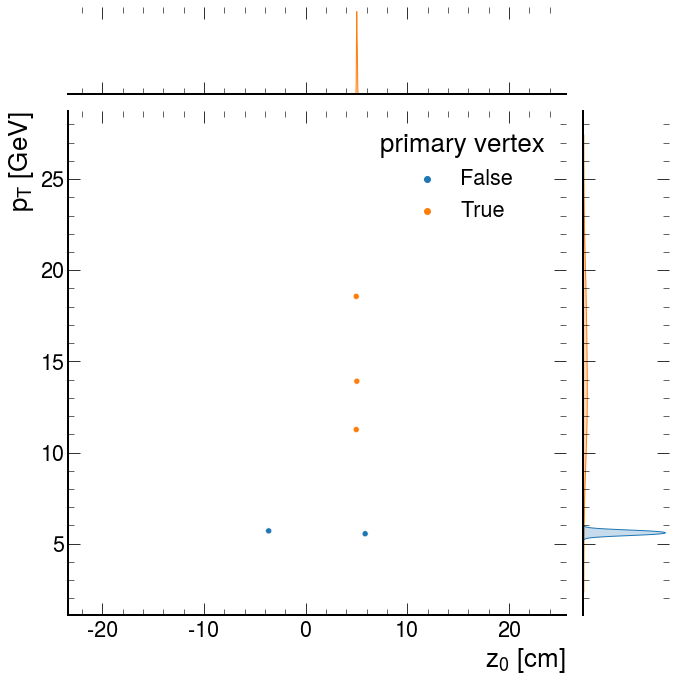

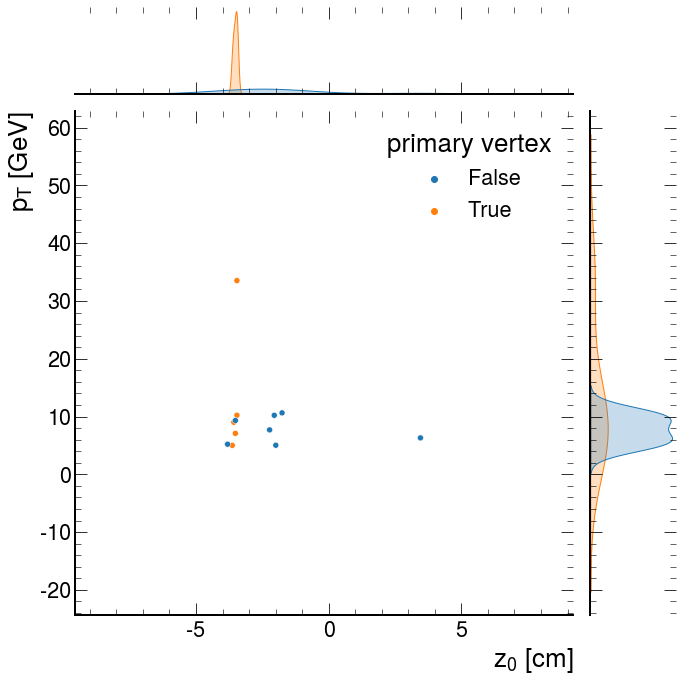

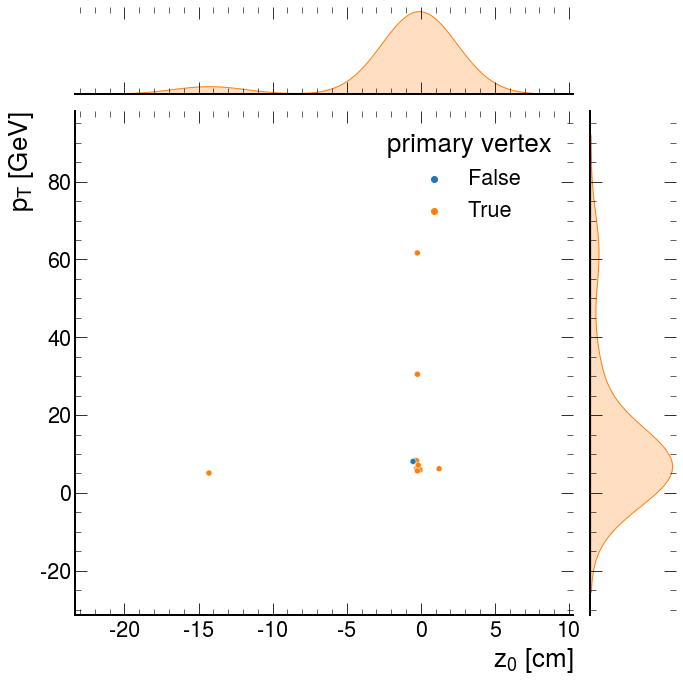

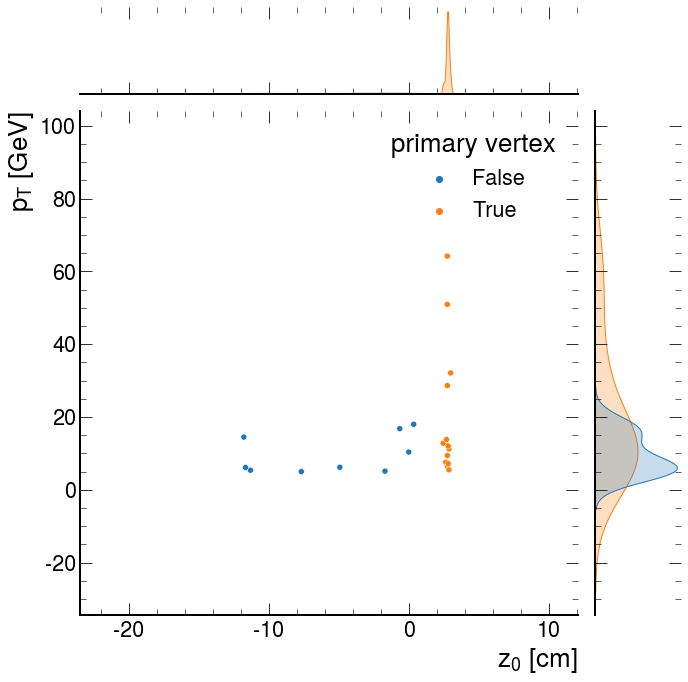

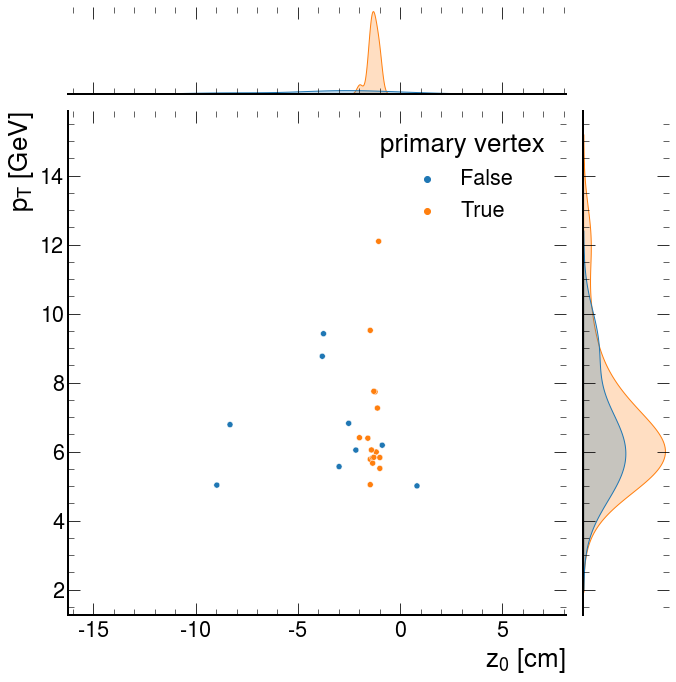

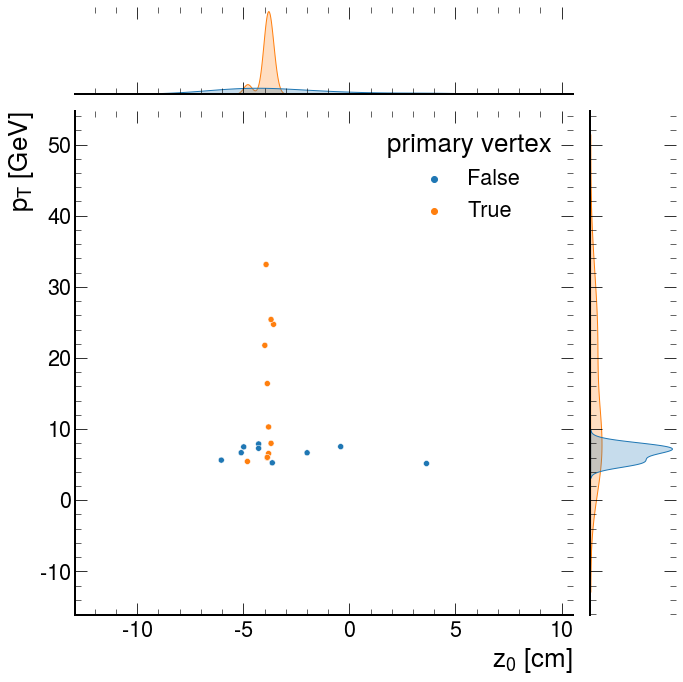

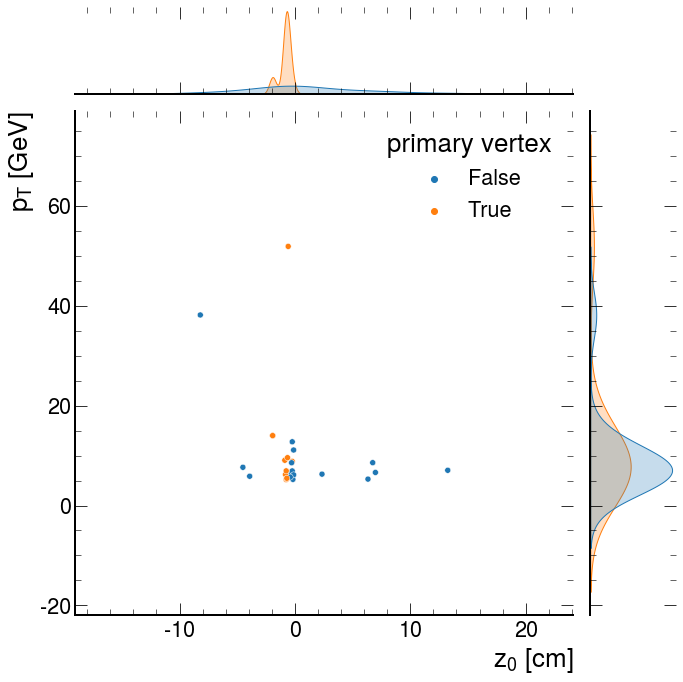

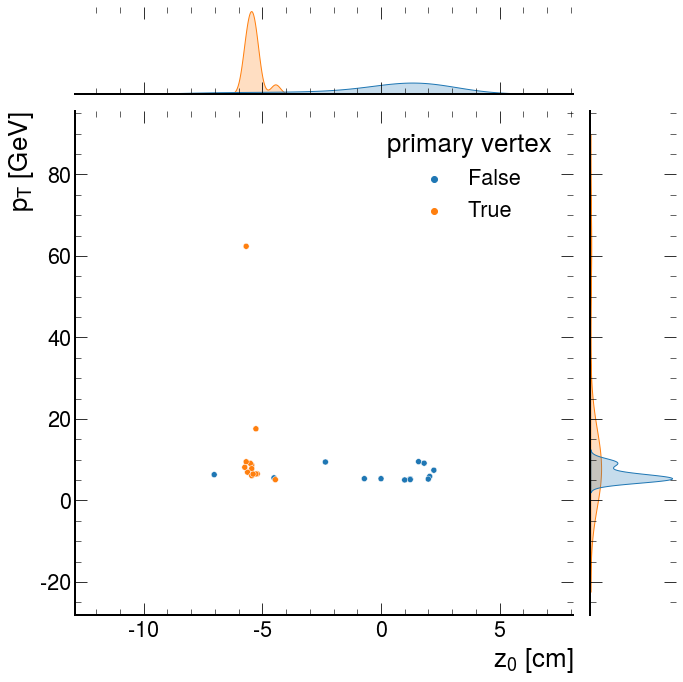

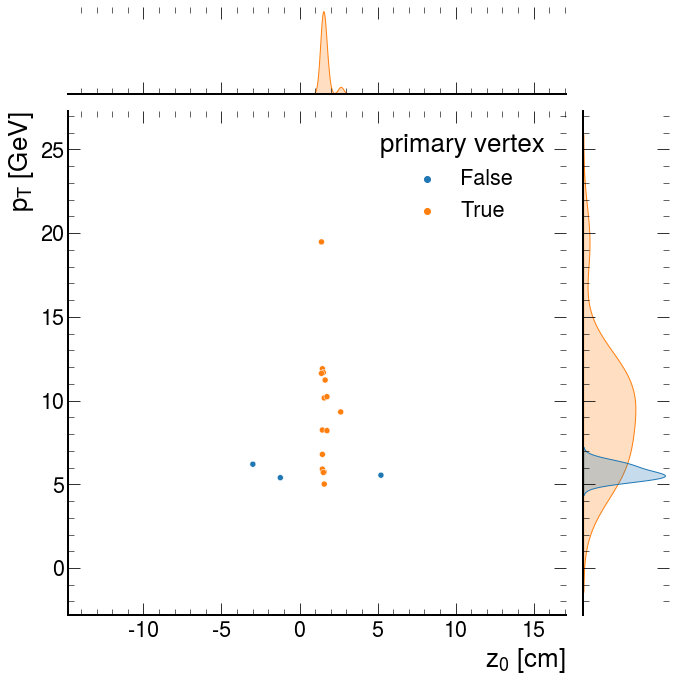

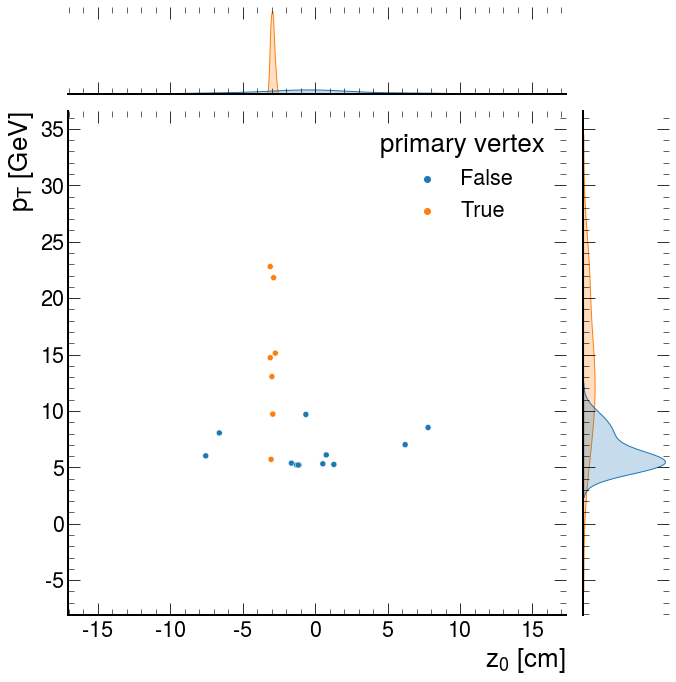

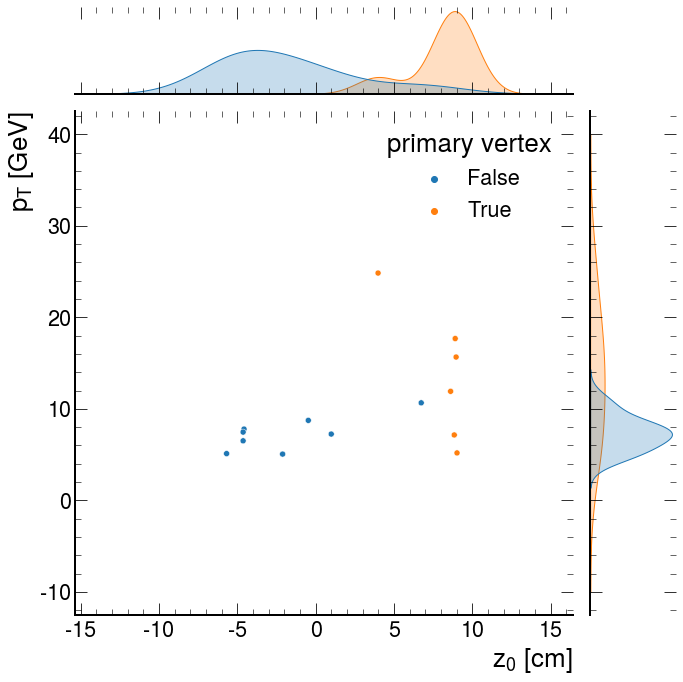

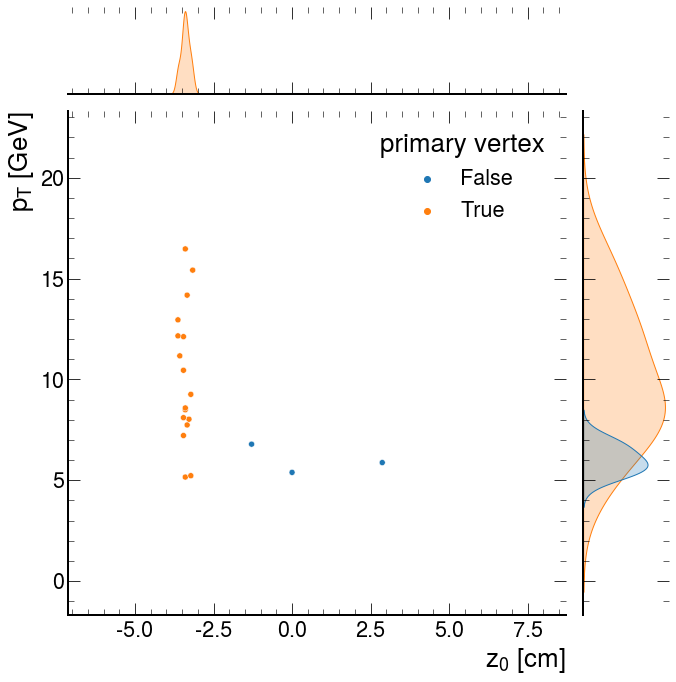

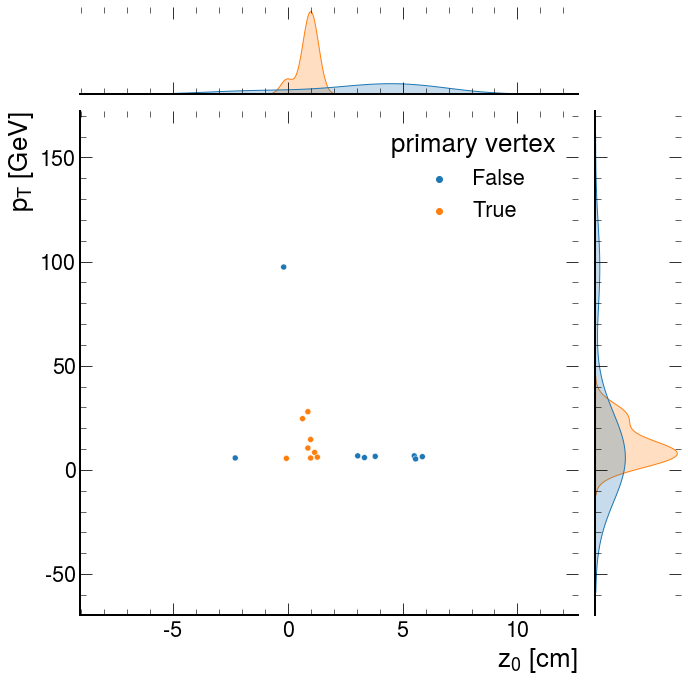

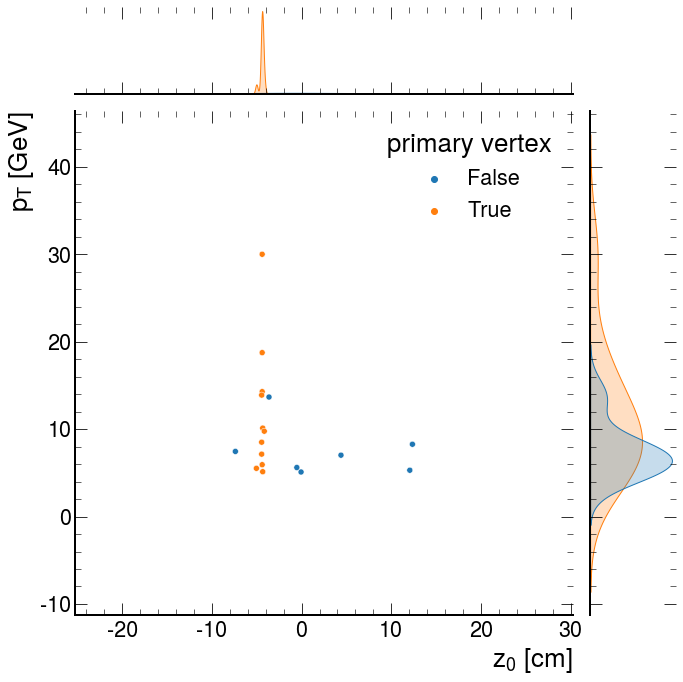

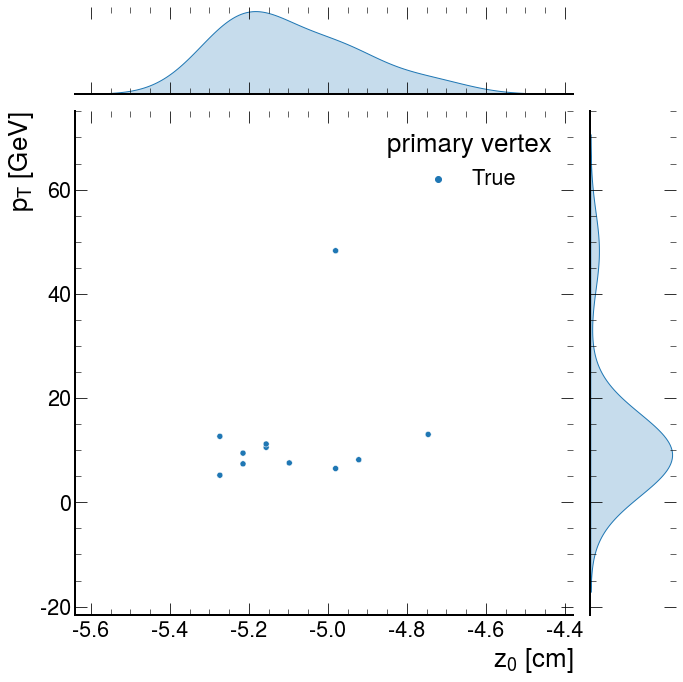

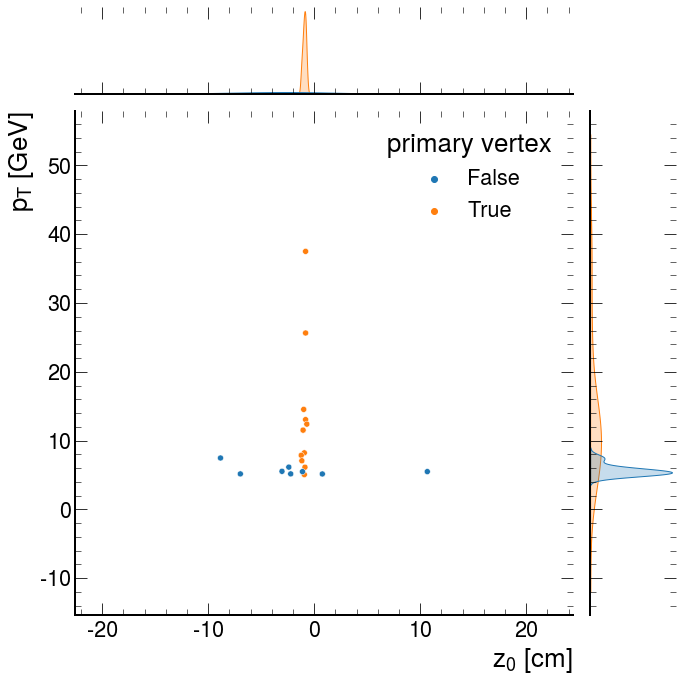

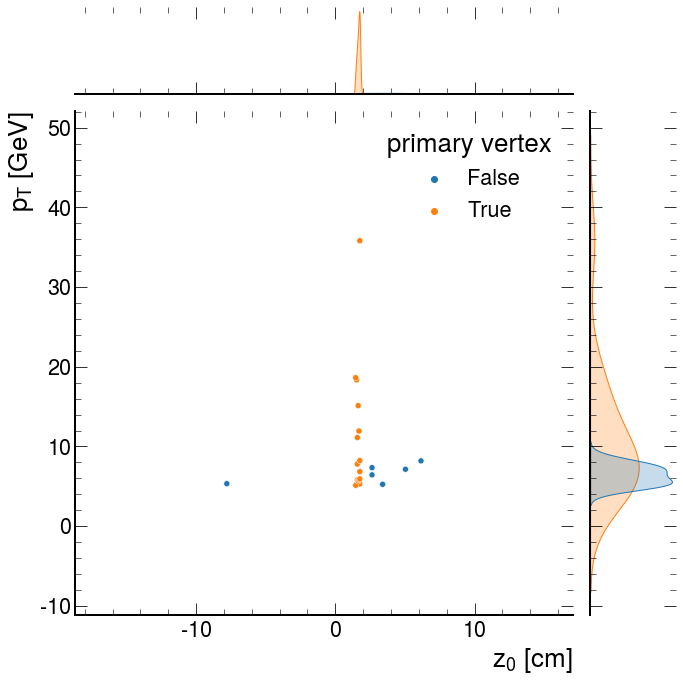

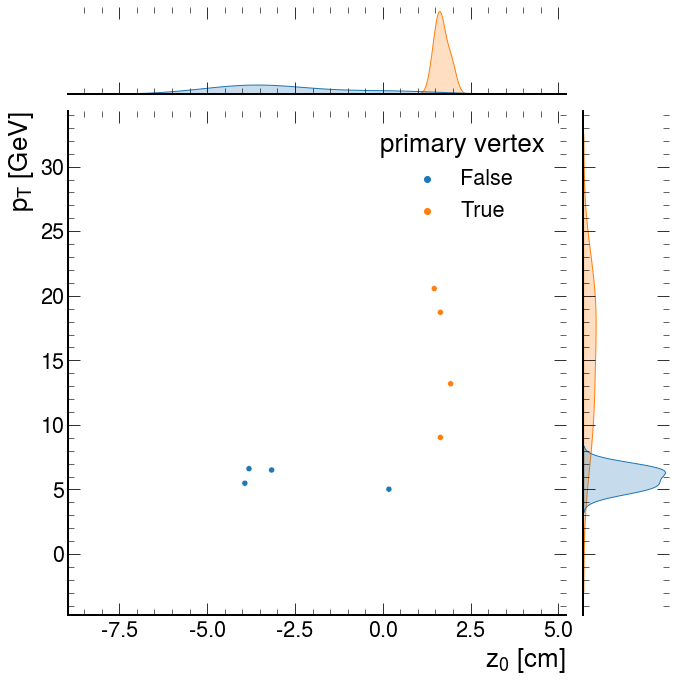

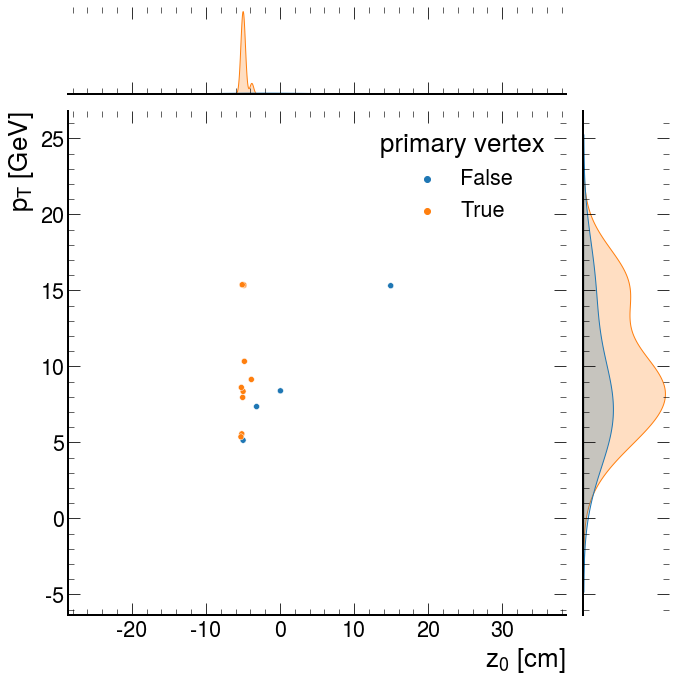

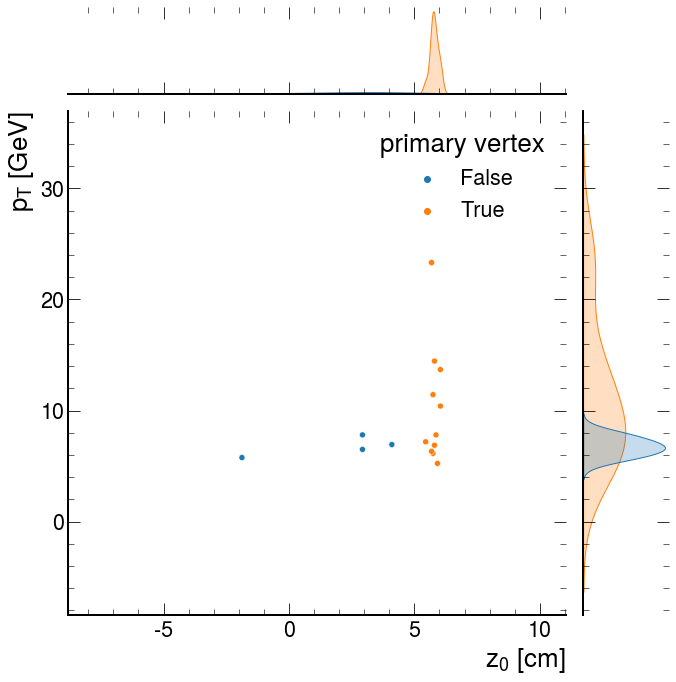

In [371]:
for i in range(20):
    h=sns.jointplot(data=trk.loc[trk.trk_pt>5].query(f'entry=={i}'), x='trk_z0',y='trk_pt', hue='primary vertex', height=10)
    h.set_axis_labels(r'$z_0$ [cm]', r'$p_T$ [GeV]')
#     plt.savefig(f'plots2d/event_{i}.png',dpi=400, bbox_inches='tight')

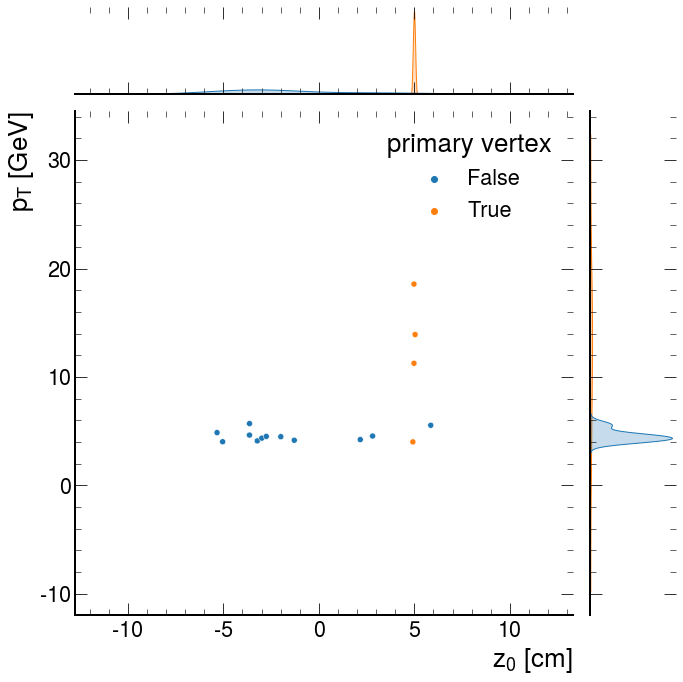

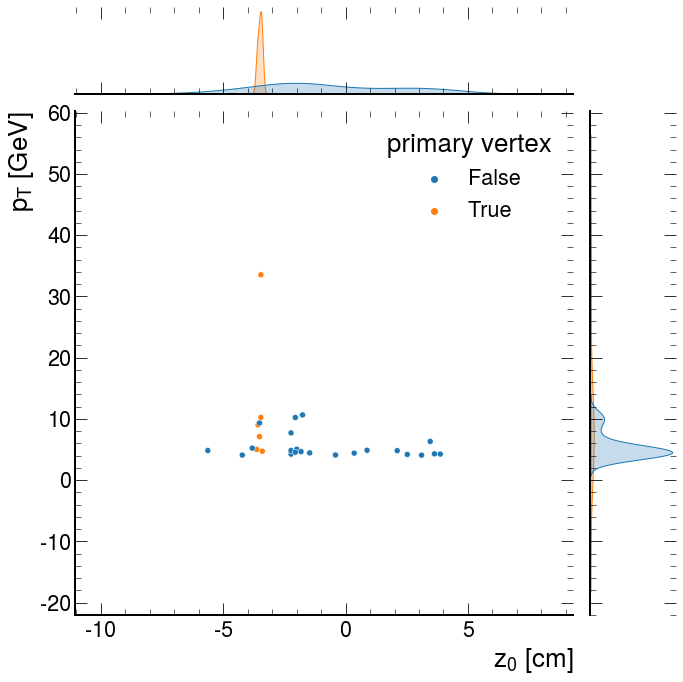

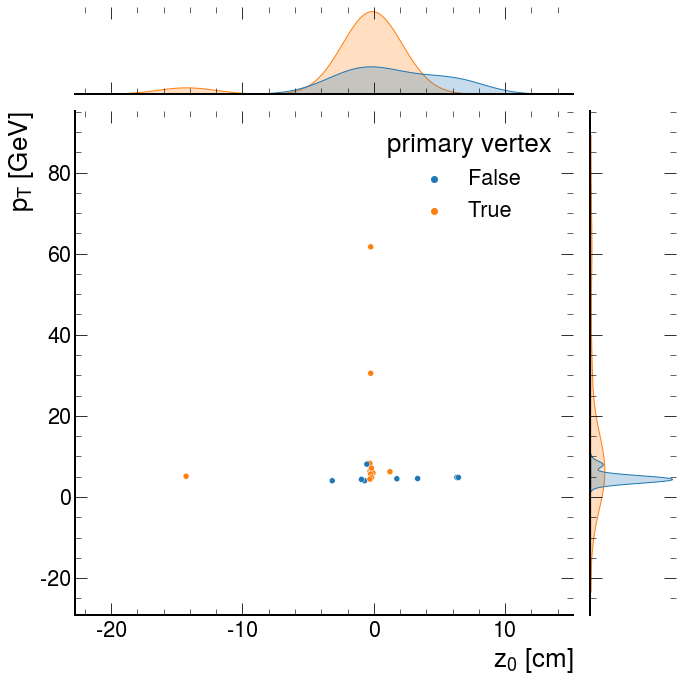

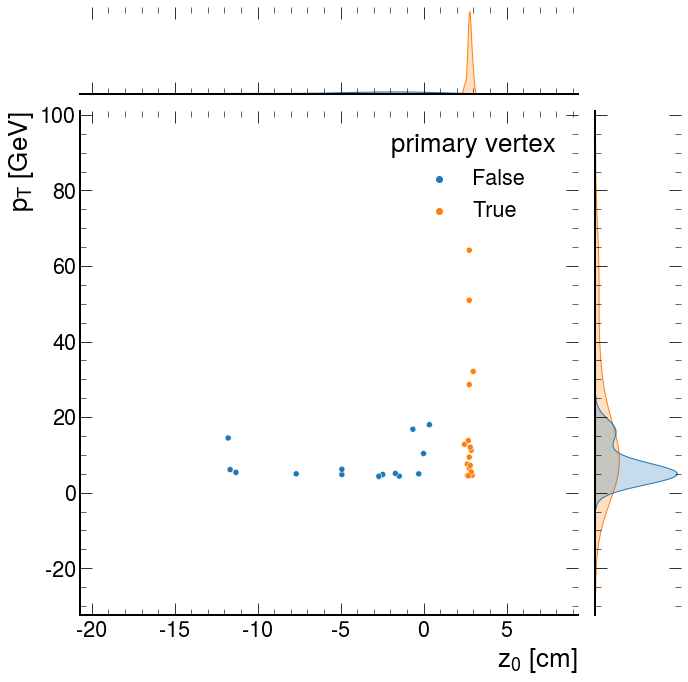

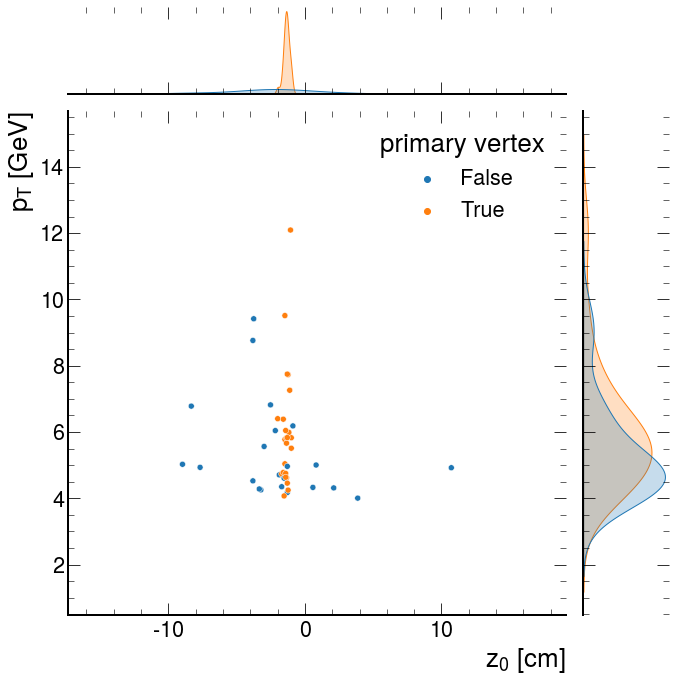

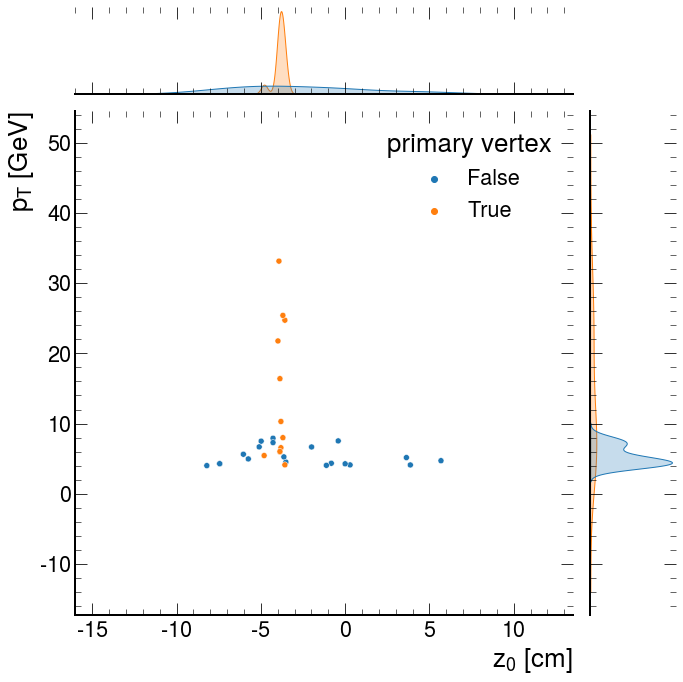

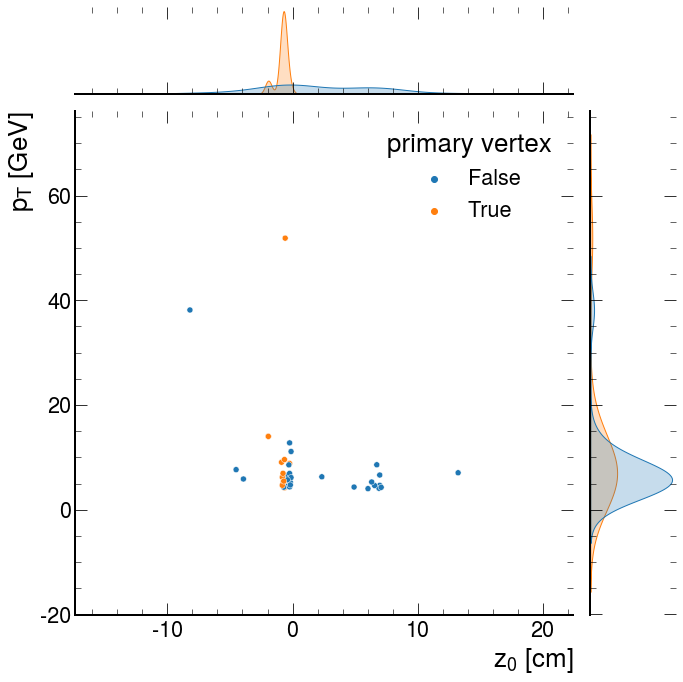

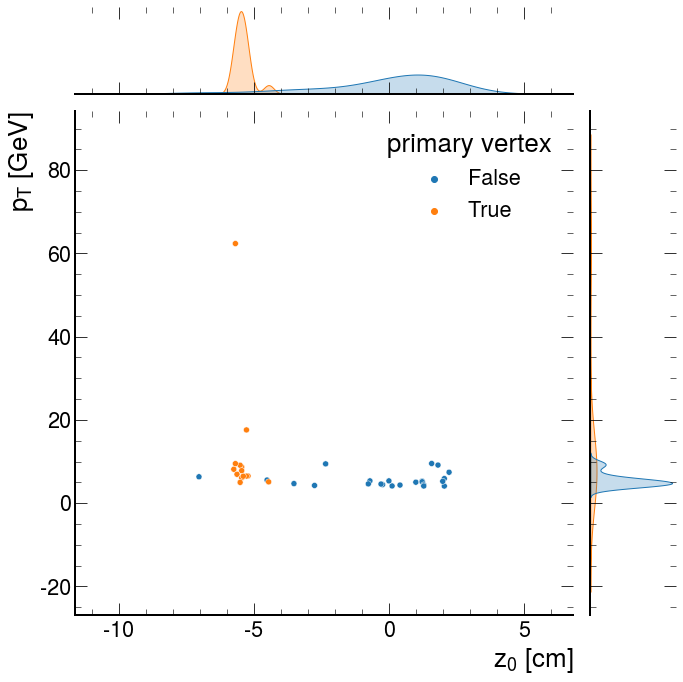

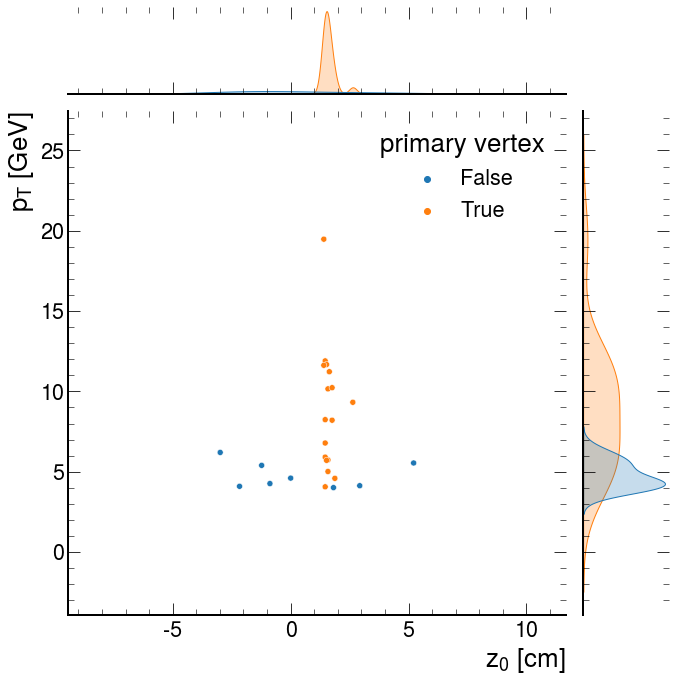

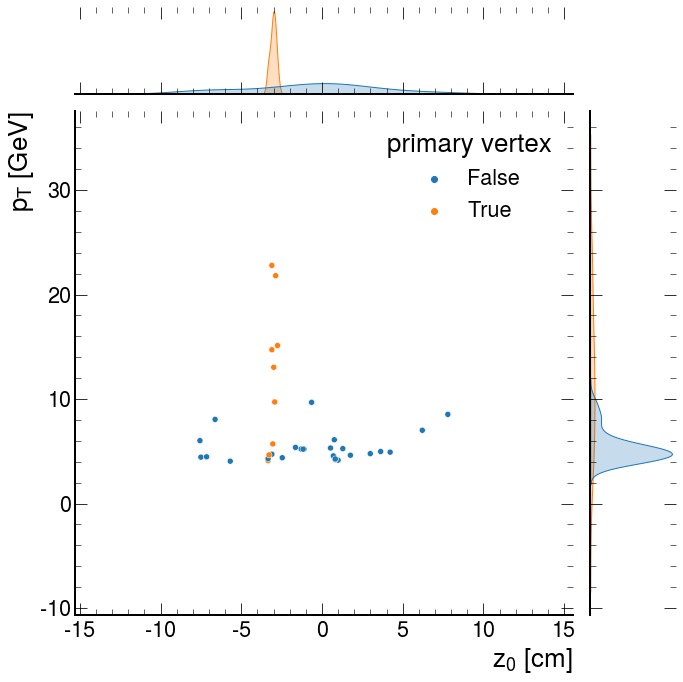

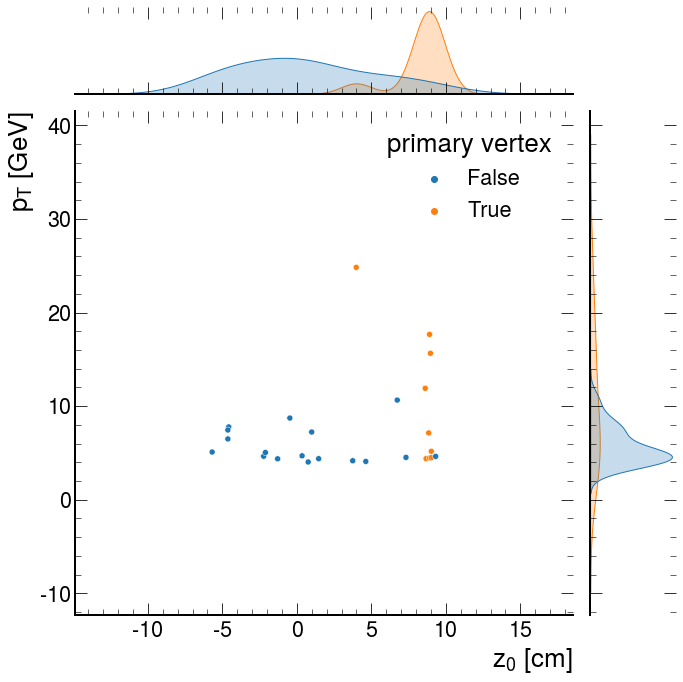

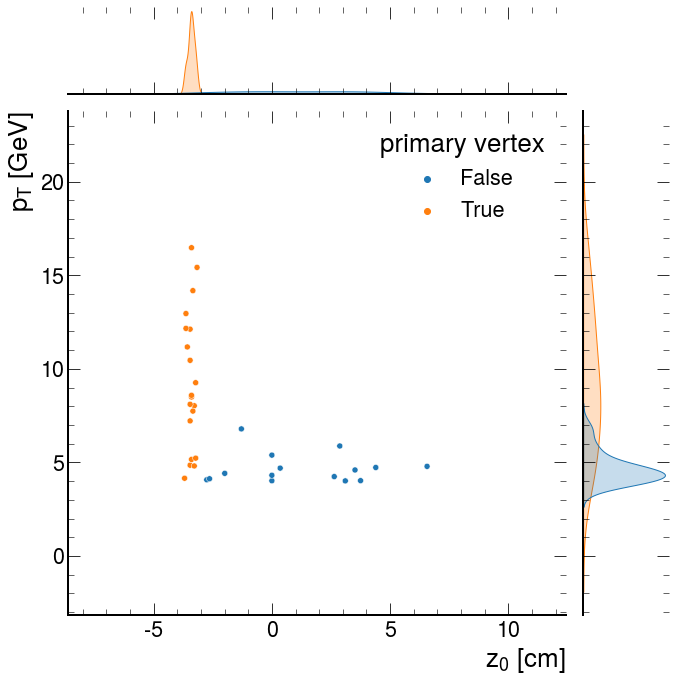

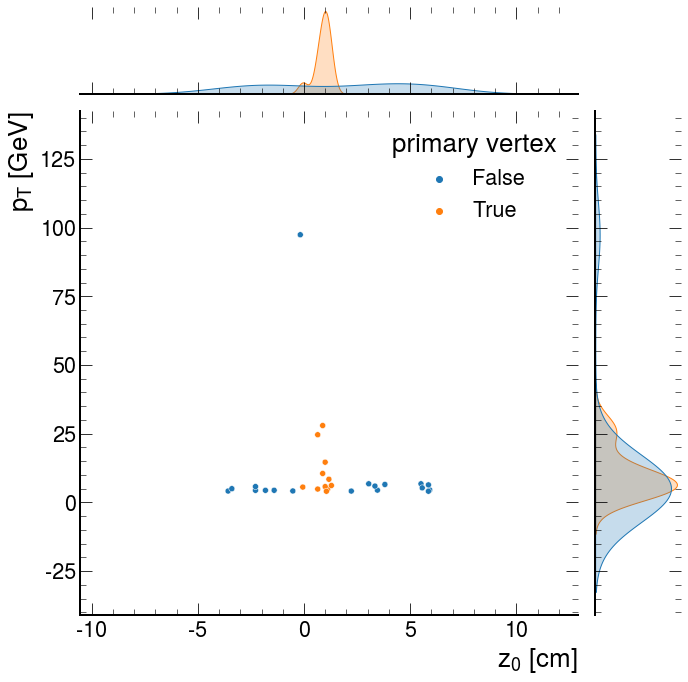

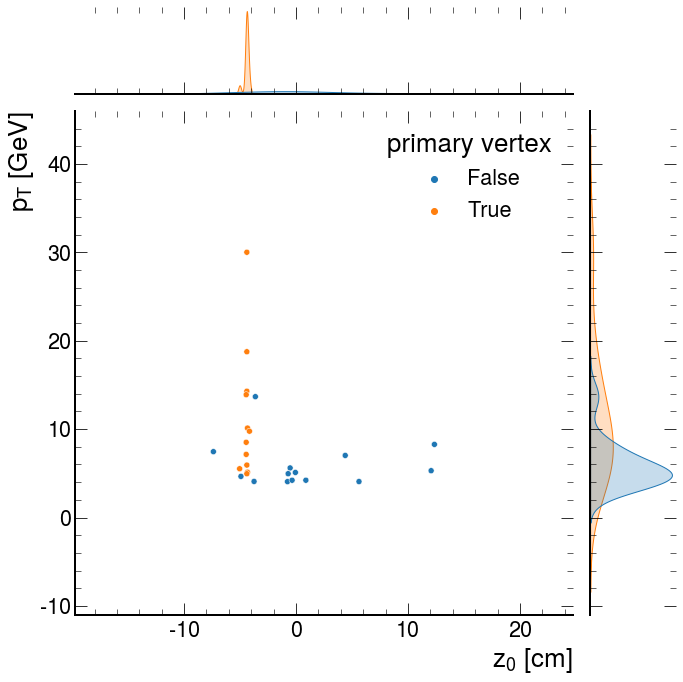

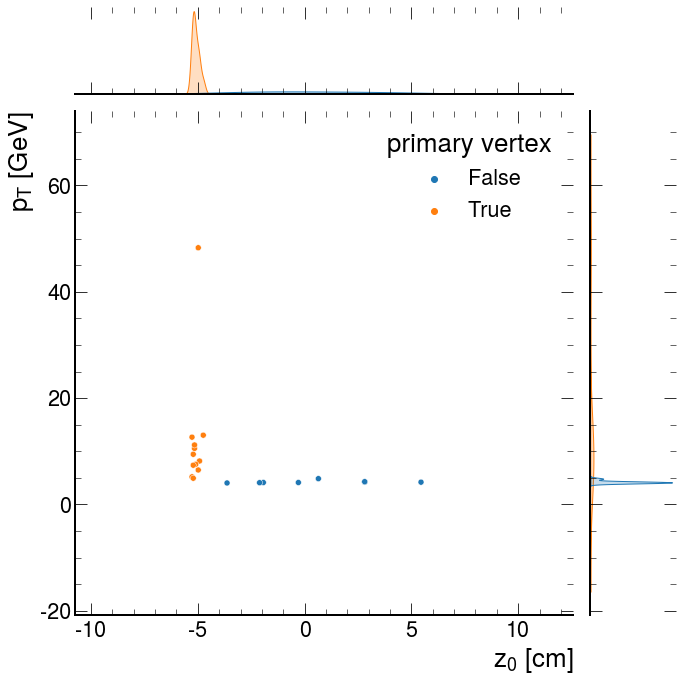

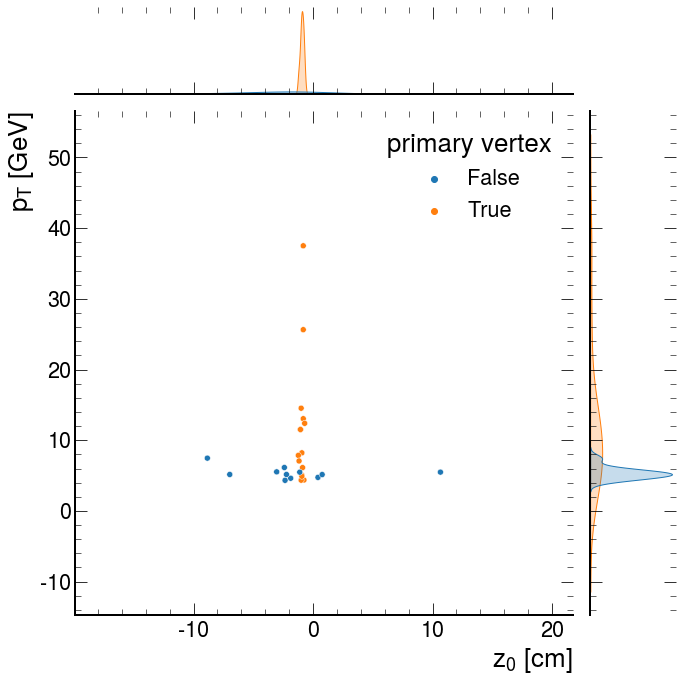

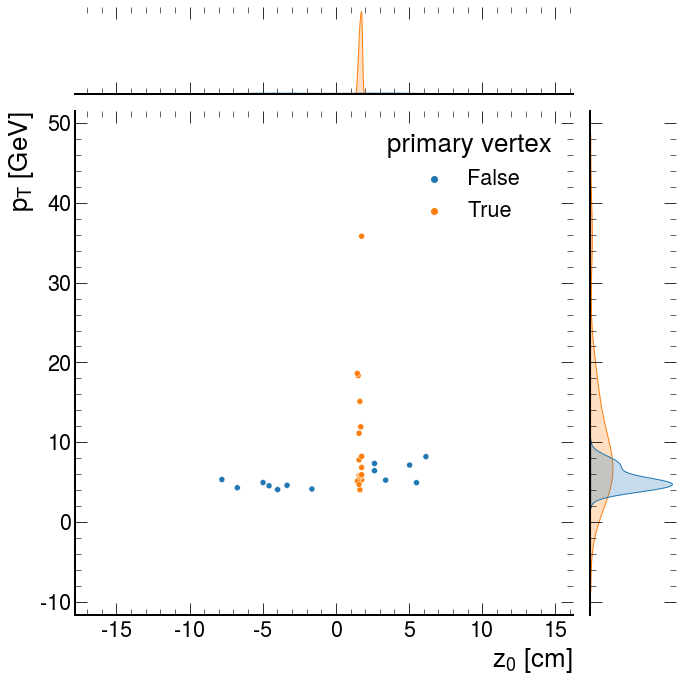

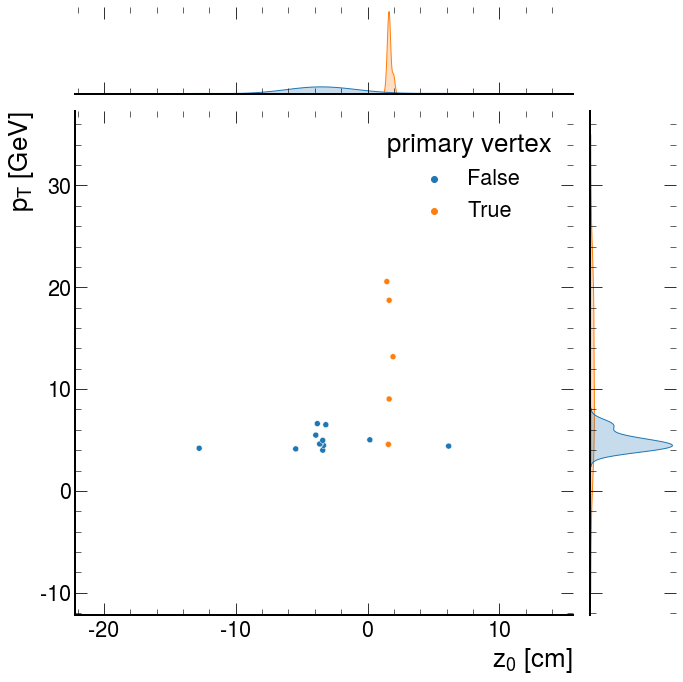

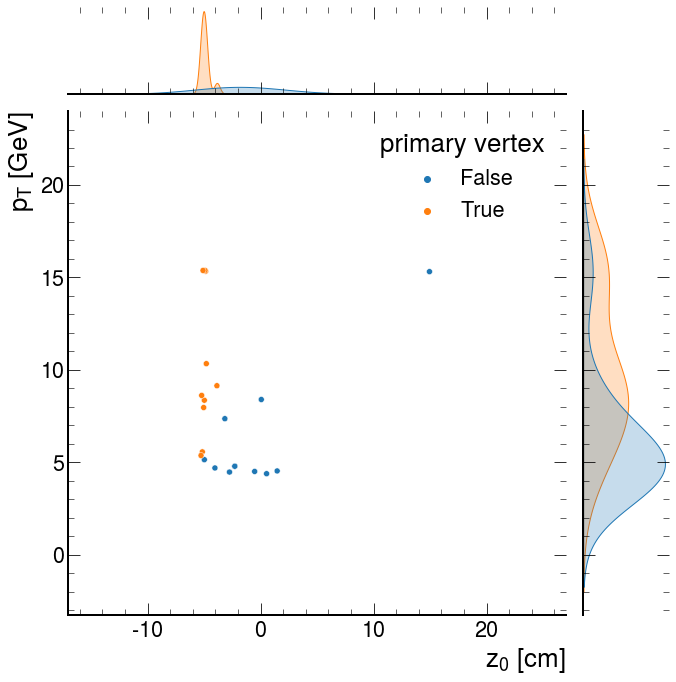

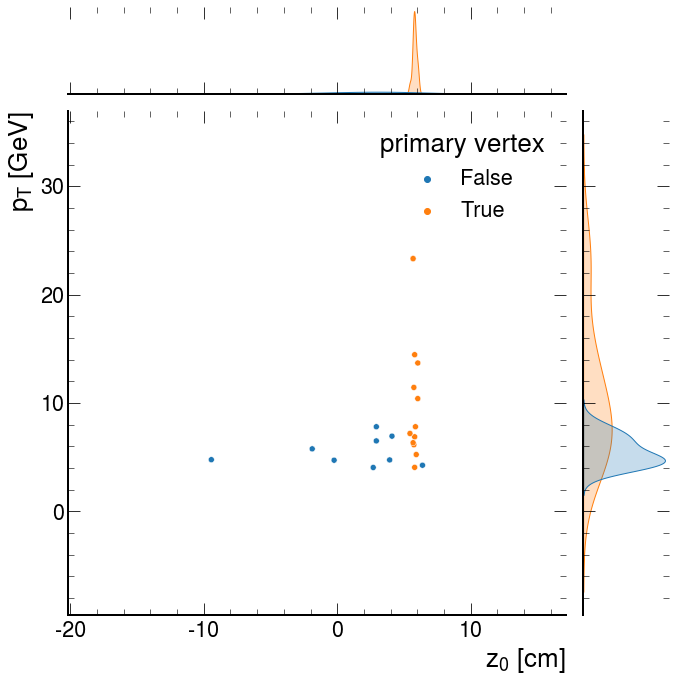

In [372]:
for i in range(20):
    h=sns.jointplot(data=trk.loc[trk.trk_pt>4].query(f'entry=={i}'), x='trk_z0',y='trk_pt', hue='primary vertex', height=10)
    h.set_axis_labels(r'$z_0$ [cm]', r'$p_T$ [GeV]')
#     plt.savefig(f'plots2d/event_{i}.png',dpi=400, bbox_inches='tight')

# DEBUG/TEST

In [341]:
clusters = [[4.3, 5.0], [5.0, 5.5], [-1, -0.5]]

In [321]:
clus_i_min = [clusters[i][0] for i in range(len(clusters))]

In [324]:
clus_j_max = [clusters[i][1] for i in range(len(clusters))]

In [329]:
clus_i_min

[4.3, 5.0, -1]

In [330]:
clus_j_max

[5.0, 5.5, -0.5]

In [332]:
A = np.zeros((3,3))

In [333]:
for i in range(3):
    for j in range(3):
        A[i,j] = clus_j_max[j] - clus_i_min[i]

In [334]:
A

array([[ 0.7,  1.2, -4.8],
       [ 0. ,  0.5, -5.5],
       [ 6. ,  6.5,  0.5]])

In [346]:
for i, cluster_i in enumerate(clusters):
    for j, cluster_j in enumerate(clusters):
        print(i, cluster_j, j, cluster_i)
        if cluster_i == cluster_j:
            continue
#         if (cluster_j[1] - cluster_i[0] < 0.15):
#             print(f"new cluster = ({cluster_j[0]}, {cluster_i[1]})")

0 [4.3, 5.0] 0 [4.3, 5.0]
0 [5.0, 5.5] 1 [4.3, 5.0]
0 [-1, -0.5] 2 [4.3, 5.0]
1 [4.3, 5.0] 0 [5.0, 5.5]
1 [5.0, 5.5] 1 [5.0, 5.5]
1 [-1, -0.5] 2 [5.0, 5.5]
2 [4.3, 5.0] 0 [-1, -0.5]
2 [5.0, 5.5] 1 [-1, -0.5]
2 [-1, -0.5] 2 [-1, -0.5]


In [347]:
print("hello")

hello
